 Mask R-CNN + FCN - Test on COCO Dataset

Run the Mask R-CNN net in inference mode, with the additional PCILayer that generates the context-based tensor 

# Setup Pipeline -  (build model and load weights)

In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
%matplotlib inline
%load_ext autoreload
%autoreload 2
import sys,os, pprint, pickle, json
pp = pprint.PrettyPrinter(indent=2, width=100)
print('Current working dir: ', os.getcwd())
if '..' not in sys.path:
    print("appending '..' to sys.path")
    sys.path.append('..')
import numpy as np
import mrcnn.utils     as utils
import mrcnn.visualize as visualize
from mrcnn.prep_notebook import build_fcn_inference_pipeline, build_mrcnn_inference_pipeline,run_mrcnn_detection
from mrcnn.prep_notebook import get_inference_batch, get_image_batch, run_mrcnn_detection, run_fcn_detection
from mrcnn.visualize     import display_training_batch
from mrcnn.coco          import prep_coco_dataset

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Current working dir:  E:\git_projs\MRCNN3\notebooks


In [2]:
# WEIGHT_FILE = 'F:/models/train_fcn8_coco_adam/fcn20181109T0000/fcn_2298.h5'
WEIGHT_FILE = 'last'
##------------------------------------------------------------------------------------
## Parse command line arguments
##------------------------------------------------------------------------------------
parser = utils.command_line_parser()
input_parms  =" --batch_size     1  "
input_parms +=" --mrcnn_logs_dir train_mrcnn_coco "
# input_parms +=" --fcn_logs_dir   train_fcn8_bce " 
# input_parms +=" --fcn_logs_dir   train_fcn8_coco_adam "
input_parms +=" --fcn_logs_dir   train_fcn8_l2_bce_subset "
input_parms +=" --mrcnn_model    last "
input_parms +=" --fcn_model      " + WEIGHT_FILE 
# input_parms +=" --fcn_model      last "
input_parms +=" --fcn_layer      all"
input_parms +=" --fcn_arch       fcn8l2 " 
input_parms +=" --sysout         screen "
input_parms +=" --scale_factor   4"
input_parms +=" --coco_classes       78 79 80 81 82 44 46 47 48 49 50 51 34 35 36 37 38 39 40 41 42 43 10 11 13 14 15 "

args = parser.parse_args(input_parms.split())
utils.display_input_parms(args)


   Arguments passed :
   --------------------
   batch_size                     1
   coco_classes                   [78, 79, 80, 81, 82, 44, 46, 47, 48, 49, 50, 51, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 10, 11, 13, 14, 15]
   epochs                         1
   evaluate_method                1
   fcn_arch                       FCN8L2
   fcn_layers                     ['all']
   fcn_logs_dir                   train_fcn8_l2_bce_subset
   fcn_losses                     fcn_BCE_loss
   fcn_model                      last
   last_epoch                     0
   lr                             0.001
   mrcnn_exclude_layers           None
   mrcnn_layers                   ['mrcnn', 'fpn', 'rpn']
   mrcnn_logs_dir                 train_mrcnn_coco
   mrcnn_model                    last
   new_log_folder                 False
   opt                            ADAGRAD
   scale_factor                   4
   steps_in_epoch                 1
   sysout                         SCREEN
   val_steps    

In [3]:
mrcnn_model, fcn_model = build_fcn_inference_pipeline(args = args,verbose = 1)


--> Execution started at: 01-08-2019 @ 15:58:49
    Tensorflow Version: 1.8.0   Keras Version : 2.1.6 
>>> Initialize Paths
 Linx  Linux

   Arguments passed :
   --------------------
   batch_size                     1
   coco_classes                   [78, 79, 80, 81, 82, 44, 46, 47, 48, 49, 50, 51, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 10, 11, 13, 14, 15]
   epochs                         1
   evaluate_method                1
   fcn_arch                       FCN8L2
   fcn_layers                     ['all']
   fcn_logs_dir                   train_fcn8_l2_bce_subset
   fcn_losses                     fcn_BCE_loss
   fcn_model                      last
   last_epoch                     0
   lr                             0.001
   mrcnn_exclude_layers           None
   mrcnn_layers                   ['mrcnn', 'fpn', 'rpn']
   mrcnn_logs_dir                 train_mrcnn_coco
   mrcnn_model                    last
   new_log_folder                 False
   opt                           


>>> Detection Layer (Inference Mode)
    Detection Layer : call()  <class 'list'> 4
    rpn_proposals_roi              :  shape: (1, ?, ?)             KB.shape:(None, 1000, 4)       Keras Tensor: True
    mrcnn_class.shape              :  shape: (?, 1000, 81)         KB.shape:(None, 1000, 81)      Keras Tensor: True
    mrcnn_bboxes.shape             :  shape: (?, 1000, 81, 4)      KB.shape:(None, 1000, 81, 4)   Keras Tensor: True
    input_image_meta               :  shape: (?, ?)                KB.shape:(None, None)          Keras Tensor: True
    Detections                     :  shape: <unknown>             KB.shape:(None, 200, 7)        Keras Tensor: True

--------------------------------
>>>  CHM Inference Layer  
--------------------------------
  > CHM Inference Layer: call  <class 'list'> 1
     detections.shape     : (None, 200, 7)

  > build_predictions Inference mode ()
    config image shape     :  [1024 1024    3] h: 1024 w: 1024
    Detection Max Instacnes:  200
    num

   FCN Block 32 shape is               :  (None, 64, 64, 256)
   FCN Block 33 shape is               :  (None, 64, 64, 256)
   FCN Block 34 (Max pooling) shape is :  (?, 32, 32, 256)
   FCN Block 41 shape is               :  (None, 32, 32, 512)
   FCN Block 42 shape is               :  (None, 32, 32, 512)
   FCN Block 43 shape is               :  (None, 32, 32, 512)
   FCN Block 44 (Max pooling) shape is :  (?, 16, 16, 512)
   FCN Block 51 shape is               :  (None, 16, 16, 512)
   FCN Block 52 shape is               :  (None, 16, 16, 512)
   FCN Block 53 shape is               :  (None, 16, 16, 512)
   FCN Block 54 (Max pooling) shape is :  (None, 8, 8, 512)

   --- FCN32 ----------------------------
   FCN fully connected 1 (fc1) shape   :  (None, 8, 8, 4096)
   FCN fully connected 2 (fc2) shape   :  (None, 8, 8, 4096)
   FCN conv2d (fcn32_deconv2D) shape   :  (?, 8, 8, 81)  keras_tensor  True

   --- FCN16 ----------------------------
   FCN scorePool4 (Conv2D(Pool4)) shape is

    alt_scores_2_norm(by_class)    :  shape: (1, 81, 200, 3)       KB.shape:(1, 81, 200, 3)       Keras Tensor: False
    alt_scores_2_norm(by_image)    :  shape: (?, 3)                KB.shape:(None, 3)             Keras Tensor: False
    fcn_scores_dense               :  shape: (?, 24)               KB.shape:(None, 24)            Keras Tensor: False
    seq_ids                        :  shape: (?,)                  KB.shape:(None,)               Keras Tensor: False
    sscatter_ids                   :  shape: (?, 2)                KB.shape:(None, 2)             Keras Tensor: False
    fcn_scores_by_class            :  shape: (1, 81, 200, 24)      KB.shape:(1, 81, 200, 24)      Keras Tensor: False
    complete                       
    * fcn_heatmap shape:           :  shape: (?, 256, 256, 81)     KB.shape:(None, 256, 256, 81)  Keras Tensor: True
    * fcn_scores shape :           :  shape: (1, 81, 200, 24)      KB.shape:(1, 81, 200, 24)      Keras Tensor: True
 self.keras_model.loss

##  Print some information about the model 

In [ ]:
# for layer in model.keras_model.layers
#     print layer.name 

layers    = [layer for layer in mrcnn_model.keras_model.layers]          # all layer outputs
print(len(layers))

for idx in range(200, len(layers)):
    print( ' layer: {} name: {}'.format(idx, layers[idx].name))
#     print(' layer {} :  {}'.format(idx,layers[idx]))
#     print(' Number of inbound nodes: ', end ='')
#     pp.pprint(len(layers[idx]._inbound_nodes))
#     pp.pprint(layers[idx].__dict__)
#     print('-------------------------------------------')
print('idx : ', idx)
pp.pprint(layers[idx].__dict__)

print()
pp.pprint(layers[idx]._inbound_nodes[0].__dict__)

####  Print Layer & Weight Info

In [ ]:
# keras_model = mrcnn_model.keras_model
# layers = keras_model.inner_model.layers if hasattr(keras_model, "inner_model") else keras_model.layers
# print(dir(layers[0]))
# pp.pprint(layers[7].weights)
print()
for i in range(len(layers)):
    print('\n{:3d} {:20s} Weights: {}'.format(i, layers[i].name, len(layers[i].weights))) ## [weight.name for weight in layers[i].weights]))
    print('{:23s}  Trainable: {} '.format(' ',[weight.name for weight in layers[i].trainable_weights]))
    for weight in layers[i].weights:
        print('{:25s} {:30s} {}  '.format(' ',weight.name,  weight.shape))

####  More layer information

In [ ]:
import pprint
pp = pprint.PrettyPrinter(indent=2, width=100)
np.set_printoptions(linewidth=100,precision=4,threshold=1000, suppress = True)

# model.compile_only(learning_rate=config.LEARNING_RATE, layers='heads')
# print('\n Metrics (_get_deduped_metrics_names():) ') 
# pp.pprint(mm._get_deduped_metrics_names())
# print('\n Losses (model.metrics_names): ') 
# pp.pprint(mm.metrics_names)
# KB.set_learning_phase(0)
# print(' Learning phase values is L ' ,KB.learning_phase())
# print('\Layers ', len(mrcnn_model.keras_model.layers))
# pp.pprint(mrcnn_model.keras_model.layers)

print('\n Weights: ') 
## Get weieights acturally returns weight dims
# print(' Number of weights arrays: ',len(mrcnn_model.keras_model.get_weights()))
print(' length of model.keras_model.weights', len(mrcnn_model.keras_model.weights))
# for i,j in enumerate(mrcnn_model.keras_model.weights):
#     print(i, j) # j.name, j.shape, j.dtype)
# pp.pprint(mrcnn_model.keras_model.weights)
# pp.pprint(type(mrcnn_model.keras_model.get_weights()))

# pp.pprint(dir(model.keras_model))
# print(mrcnn_model.keras_model.weights[1])

#### List trainable layers using `get_trainable_layers()`

In [ ]:
for i in  mrcnn_model.get_trainable_layers():
    print(' Layer:', i.name)       

####  Get a list of trainable layers, i.e., layers that have weights

In [ ]:
# trainable = mrcnn_model.get_trainable_layers()
layers    = [layer for layer in mrcnn_model.keras_model.layers]          # all layer outputs
print('Trn  Idx   Layer Name   \t\t InputNode LayerNames \t\t InputNode LayerShapes')
for idx, layer in enumerate(layers):
    TrnFlg = 'T' if layer.get_weights() else ' '
    all_input_shapes = [node.input_shapes   for node in layer._inbound_nodes][0]
    input_nodes  = [node for node in layer._inbound_nodes]
    all_nodes_layers  = [node.inbound_layers for node in input_nodes]   
#     print(all_input_nodes)
#     all_nodes_layers  = [[node.inbound_layers for node in input_nodes]  for input_nodes in layer._inbound_nodes]  #[node for node in all_input_nodes]]]
    all_input_layer_names = [[layer.name for layer in node_layers] for node_layers in all_nodes_layers][0]        
    str_names = ','.join(map(str, all_input_layer_names)) 
    str_shapes = ','.join(map(str, all_input_shapes)) 
    print(' {} ; {:3d} ; {:25s}; {:30s}; {:30s} '.format( TrnFlg, idx, layer.name,  str_names, str_shapes))

In [ ]:
print()    
for i in range(194,len(layers)):
# for i in [206]:
    layer = layers[i]
    print('====================================================='.format(i))
    print('== Layer {} : {} '.format(i,layer.name))
    print('====================================================='.format(i))
    pp.pprint(layer.__dict__)
    print()
    for j,node in enumerate(layer._inbound_nodes):
        print('== Inbound Node {} ========================================='.format(j))
        print(type(node))
        pp.pprint(node.__dict__)
        node_inlayers_names = [n.name for n in node.inbound_layers]
        print(node_inlayers_names)

# Build test datasets

In [4]:
print('load coco classes: ', args.coco_classes)

# dataset_test, test_generator = prep_coco_dataset(["train", "val35k"], mrcnn_model.config, generator = True , return_coco = False, load_coco_classes = args.coco_classes)
dataset_test, test_generator = prep_coco_dataset(["minival"], mrcnn_model.config, generator = True , return_coco = False, load_coco_classes = args.coco_classes)
# dataset_test.display_class_info()
dataset_test.display_active_class_info()
print("Testing Dataset Image Count: {}".format(len(dataset_test.image_ids)))
print("Testing Dataset Class Count: {}".format(dataset_test.num_classes))
class_names = dataset_test.class_names


load coco classes:  [78, 79, 80, 81, 82, 44, 46, 47, 48, 49, 50, 51, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 10, 11, 13, 14, 15]
   Loading annotations for all Coco classes ...    
loading annotations into memory...
Done (t=0.97s)
creating index...
index created!
 load subset of classes:  [78, 79, 80, 81, 82, 44, 46, 47, 48, 49, 50, 51, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 10, 11, 13, 14, 15]
 image dir            :  /home/kbardool/MLDatasets/coco2014/val2014
 json_path_dir        :  /home/kbardool/MLDatasets/coco2014/annotations/instances_minival2014.json
 number of images     :  2416
 image_ids[:10]       :  [532481, 385029, 311303, 393226, 532493, 458768, 327701, 434204, 24610, 344100]
 image_ids[1000:1010] :  [527695, 322895, 175438, 314709, 109916, 355677, 273760, 216419, 52591, 290163]
Prepares complete
[10, 11, 12, 13, 14, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 69, 70, 71, 72, 73]
internal_class:  10 ext_cls: 10 name: outdoor - traffic light
inter

###  Display some images from dataset

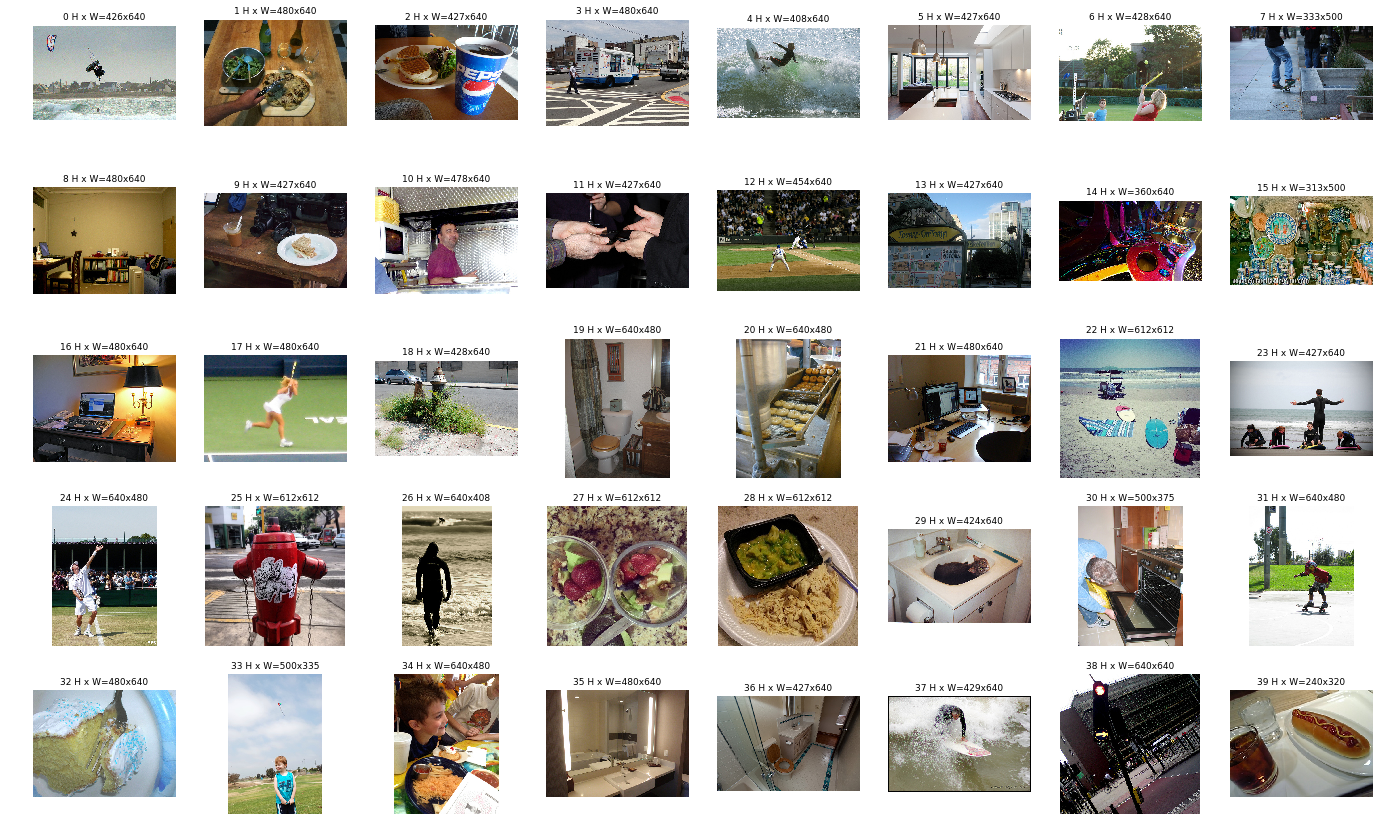

In [5]:
image_list = list(range(0,40))
image_titles = [str(i) for i in image_list]
images = get_image_batch(dataset_test, image_list)
visualize.display_images(images, titles = image_titles, cols = 8, width = 24)

# MRCNN Detection pipeline on images

##  Run MRCNN detection pipeline on first image

### Load an image using `get_inference_batch()`

D:\Program Files\Anaconda3\envs\TF\lib\site-packages\scipy\ndimage\interpolation.py:583: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


Processing 1 images
image                    shape: (332, 500, 3)         min:    0.00000  max:  255.00000
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10001
image_metas              shape: (1, 89)               min:    0.00000  max: 1024.00000
 Image_id    :  10  Reference:  http://cocodataset.org/#explore?id=131107 Coco Id: 131107
 Image meta  :  [  10  332  500    3  172    0  852 1024]
 Class ids   :  (7,)    [10 10 10 10 10 10 10]
 Class Names :  ['traffic light', 'traffic light', 'traffic light', 'traffic light', 'traffic light', 'traffic light', 'traffic light']


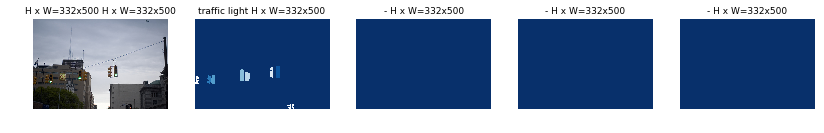

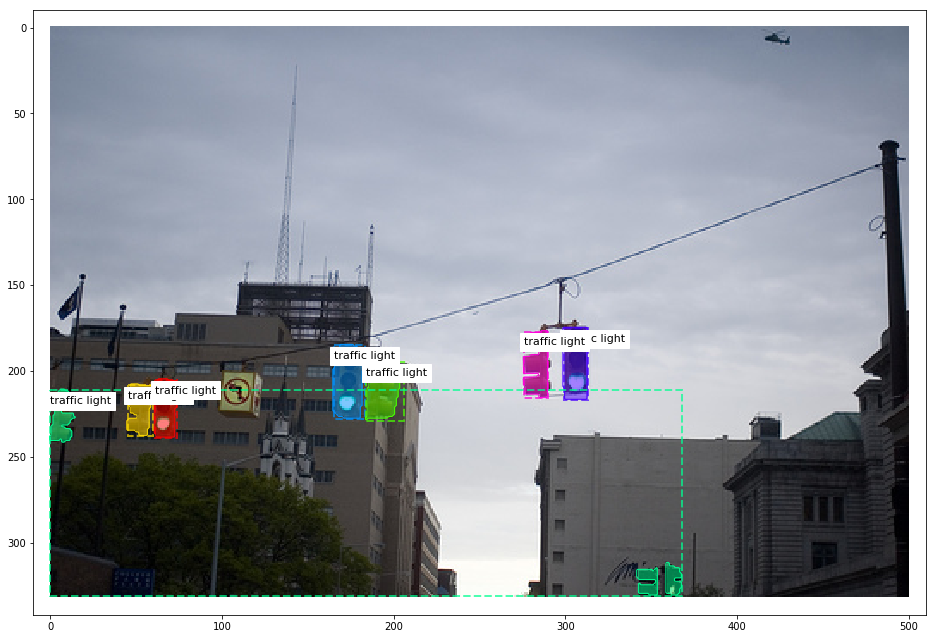

In [12]:
test_batch = get_inference_batch(dataset_test,mrcnn_model.config, 10, display=True)
# image = get_image_batch(dataset_test, 10, display=True)

In [40]:
type(test_batch_x)
for i in test_batch_x:
    print(type(i))

<class 'list'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [14]:
results = run_mrcnn_detection(mrcnn_model,dataset_test, image_ids=10, verbose = 1)

Image Id  : 10     External Id: coco.131107     Image Reference: http://cocodataset.org/#explore?id=131107
call mrcnn.detect_from_images()
Processing 1 images
image                    shape: (332, 500, 3)         min:    0.00000  max:  255.00000
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000
image_metas              shape: (1, 89)               min:    0.00000  max: 1024.00000
===>  call mrcnn_model.keras_model.predict()


 config.DETECTION_MAX_INSTANCES:  200
 Detections shape: (10, 7)
 mrcnn.detect() : Return from  predict()
    Length of detections   :  1
    Length of rpn_roi_proposals   :  1
    Length of mrcnn_class  :  1
    Length of mrcnn_bbox   :  1
    Length of pr_hm        :  1
    Length of pr_hm_scores :  1

 pr_scores_by_class shape: (81, 200, 24)
 molded_rois: (10, 4)
 final_rois: (10, 4)
 pr_scores_by_class shape: (81, 200, 24)
 pr_scores_by_image shape: (10, 24)
===>   return from  MRCNN detect() :  1

 output  0    ['class_ids

D:\Program Files\Anaconda3\envs\TF\lib\site-packages\scipy\ndimage\interpolation.py:583: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


###  Display Results

In [16]:
np_format = {}
float_formatter = lambda x: "%10.4f" % x
int_formatter   = lambda x: "%10d" % x
np_format['float'] = float_formatter
np_format['int']   = int_formatter
np.set_printoptions(linewidth=195, precision=4, floatmode='fixed', threshold =10000, formatter = np_format)

#### Display MRCNN scores - 1st style

In [17]:
lmt =15
r = results[0]
print('       classes :', r['class_ids'][:lmt])
names  = " ".join([ '{:>10s}'.format(class_names[i][-10:]) for i in r['class_ids'][:lmt]])

print('               : ', names)
print('                ', r['detection_ind'][:lmt])
print('   orig scores :',r['scores'][:lmt])
print('   norm scores :', r['pr_scores'][:lmt,8])
# print('  pr_scores[5] :', r['pr_scores'][:,5])

print('-'*185)
print('   pr_scrs[11] :', r['pr_scores'][:lmt,11])
# print(' fcn_scores[8] :', r['fcn_scores'][:lmt,11])
print()
print(' pr_scores[14] :', r['pr_scores'][:lmt,14])
# print('fcn_scores[13] :', r['fcn_scores'][:lmt,14])
print()
print(' pr_scores[20] :', r['pr_scores'][:lmt,20])
# print('fcn_scores[19] :', r['fcn_scores'][:lmt,20])

       classes : [        10         10         10         10         10         10         10         10         10          5]
               :  ffic light ffic light ffic light ffic light ffic light ffic light ffic light ffic light ffic light   airplane
                 [         1          1          1          1          1          1          1          1          1          1]
   orig scores : [    0.9984     0.9973     0.9956     0.9951     0.9949     0.9933     0.9860     0.7891     0.6968     0.6812]
   norm scores : [    1.0000     0.9988     0.9972     0.9966     0.9964     0.9949     0.9875     0.7904     0.6979     1.0000]
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
   pr_scrs[11] : [    0.9304     0.9135     0.9005     0.9352     0.9476     0.9410     0.9399     0.7615     0.4676     0.7808]

 pr_scores[14] : [    0.6568     0.6836 

####  Display MRCNN scores - 2nd style

In [18]:
r = results[0]
for molded_bbox, cls, scr, pr_scr in zip(r['molded_rois'].astype(np.int), r['class_ids'],  r['scores'], r['pr_scores']):
    print('{} {:2d}  {:.<18s}  {:5.4f} {}  '.format(molded_bbox, cls, dataset_test.class_names[cls], scr, pr_scr[[4,5,6,7, 8]]))
    print('{:>86s} {}'.format(' mrcnn old style scores:  ',  pr_scr[[9,10,11]]))
#     print('{:>86s} {}'.format(' fcn old style scores:    ', fcn_scr[[9,10,11]]))
    print()
    print('{:>86s} {}'.format(' mrcnn alt scores1:  ',pr_scr[[12,13,14,15,16,17]]))
    print('{:>86s} {}'.format(' mrcnn_scores2 :  ',   pr_scr[[18,19,20,21,22,23]]))
    print()
#     print('{:>86s} {}'.format(' fcn alt scores1:  ',fcn_scr[[12,13,14,15,16,17]]))
#     print('{:>86s} {}'.format(' fcn_scores2:  '    ,fcn_scr[[18,19,20,21,22,23]]))
    print()

[       564        344        640        372] 10  traffic light.....  0.9984 [   10.0000     0.9984     1.0000   200.0000     1.0000]  
                                                             mrcnn old style scores:   [    0.9304   133.0000     0.9304]

                                                                  mrcnn alt scores1:   [   18.3893    28.0000     0.6568     0.9607     0.9333     0.9607]
                                                                     mrcnn_scores2 :   [   18.3893    28.0000     0.6568     0.9607     0.9333     0.9607]


[       587        122        663        149] 10  traffic light.....  0.9973 [   10.0000     0.9973     1.0000   199.0000     0.9988]  
                                                             mrcnn old style scores:   [    0.9146   128.2500     0.9135]

                                                                  mrcnn alt scores1:   [   19.1409    28.0000     0.6836     1.0000     0.9333     1.0000]
               

#### Display MRCNN scores - 3rd style

In [32]:
for scr, pr_scr in zip(r['scores'], r['pr_scores']):
    print("{:7.5f}   pr: {:7.5f}  norm_scr: {:7.5f}   ALT Scr0: {:7.5f}  Alt1: {:7.5f}  Alt2: {:7.5f}".format(scr, pr_scr[5], pr_scr[8], pr_scr[11], pr_scr[14], pr_scr[20]))

0.99844   pr: 0.99844  norm_scr: 1.00000   ALT Scr0: 0.93038  Alt1: 0.65676  Alt2: 0.65676
0.99728   pr: 0.99728  norm_scr: 0.99884   ALT Scr0: 0.91351  Alt1: 0.68360  Alt2: 0.68360
0.99563   pr: 0.99563  norm_scr: 0.99718   ALT Scr0: 0.90050  Alt1: 0.67112  Alt2: 0.67112
0.99506   pr: 0.99506  norm_scr: 0.99661   ALT Scr0: 0.93519  Alt1: 0.65368  Alt2: 0.65368
0.99486   pr: 0.99486  norm_scr: 0.99641   ALT Scr0: 0.94764  Alt1: 0.60187  Alt2: 0.60187
0.99331   pr: 0.99331  norm_scr: 0.99486   ALT Scr0: 0.94096  Alt1: 0.66877  Alt2: 0.66877
0.98597   pr: 0.98597  norm_scr: 0.98751   ALT Scr0: 0.93988  Alt1: 0.66922  Alt2: 0.66922
0.78915   pr: 0.78915  norm_scr: 0.79038   ALT Scr0: 0.76154  Alt1: 0.51971  Alt2: 0.51971
0.69678   pr: 0.69678  norm_scr: 0.69787   ALT Scr0: 0.46758  Alt1: 0.42701  Alt2: 0.42701
0.68116   pr: 0.68116  norm_scr: 1.00000   ALT Scr0: 0.78082  Alt1: 0.55099  Alt2: 0.55099


In [23]:
float_formatter = lambda x: "%9.4f" % x
np_format = {}
np_format['float']=float_formatter
np.set_printoptions(linewidth=195, precision=3, floatmode='fixed', threshold =10000, formatter = np_format)
for i in range(results[0]['pr_scores'].shape[0]):
    print(results[0]['pr_scores'][i,4:18])

[  10.0000    0.9984    1.0000  200.0000    1.0000    0.9304  133.0000    0.9304   18.3893   28.0000    0.6568    0.9607    0.9333    0.9607]
[  10.0000    0.9973    1.0000  199.0000    0.9988    0.9146  128.2500    0.9135   19.1409   28.0000    0.6836    1.0000    0.9333    1.0000]
[  10.0000    0.9956    1.0000  198.0000    0.9972    0.9030  145.2500    0.9005   18.7915   28.0000    0.6711    0.9817    0.9333    0.9817]
[  10.0000    0.9951    1.0000  197.0000    0.9966    0.9384  109.6875    0.9352   15.6882   24.0000    0.6537    0.8196    0.8000    0.9562]
[  10.0000    0.9949    1.0000  196.0000    0.9964    0.9511  148.7500    0.9476   18.0561   30.0000    0.6019    0.9433    1.0000    0.8804]
[  10.0000    0.9933    1.0000  195.0000    0.9949    0.9458  148.6250    0.9410   18.7256   28.0000    0.6688    0.9783    0.9333    0.9783]
[  10.0000    0.9860    1.0000  194.0000    0.9875    0.9518  108.7500    0.9399   16.0613   24.0000    0.6692    0.8391    0.8000    0.9790]
[  10.

### Display detections on Image

Image Meta:  [  10  332  500    3  172    0  852 1024    1    1]


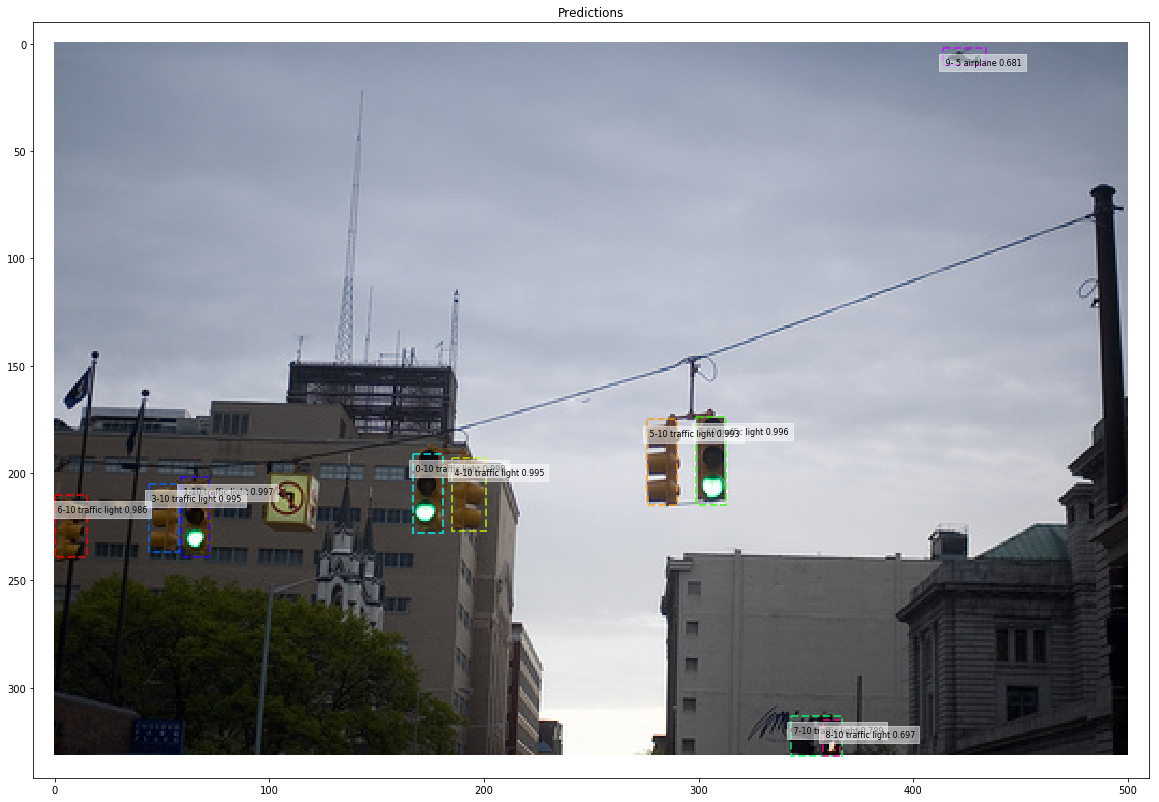

In [8]:
from mrcnn.utils import log # Display results
ax = visualize.get_ax(rows =1, cols = 1, size= 20)
r = results[0]
print('Image Meta: ', r['orig_image_meta'][:10])
visualize.display_instances(r['image'], r['rois'],  r['class_ids'], dataset_test.class_names, r['scores'], 
                            ax=ax, title="Predictions", score_range=(0.0, 1.7))

### Compute mAP and Display Precision/Recall Curve

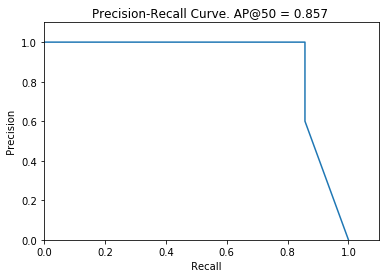

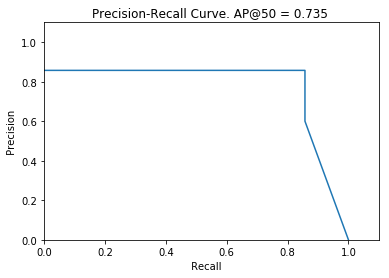

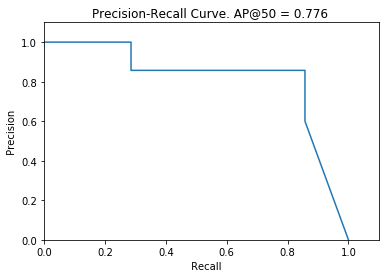

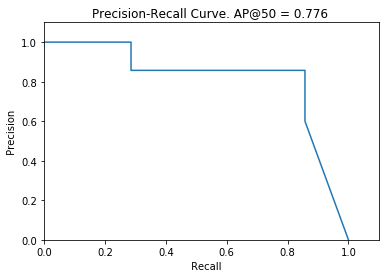

In [19]:
orig_score = 5
norm_score = 8
alt_scr_0  = 11
alt_scr_1  = 14   # in MRCNN alt_scr_1 ans alt_scr_2 are the same
alt_scr_2  = 18

# Draw precision-recall curve
r = results[0]
AP, precisions, recalls, overlaps = utils.compute_ap(r['gt_bbox'], r['gt_class_id'], r['molded_rois'], r['class_ids'], r['scores'])
visualize.plot_precision_recall(AP, precisions, recalls)
# same as above
# AP, precisions, recalls, overlaps = utils.compute_ap(r['gt_bbox'], r['gt_class_id'], r['molded_rois'], r['class_ids'], r['pr_scores'][:,orig_score])
# visualize.plot_precision_recall(AP, precisions, recalls)
AP, precisions, recalls, overlaps = utils.compute_ap(r['gt_bbox'], r['gt_class_id'], r['molded_rois'], r['class_ids'], r['pr_scores'][:,norm_score])
visualize.plot_precision_recall(AP, precisions, recalls)
AP, precisions, recalls, overlaps = utils.compute_ap(r['gt_bbox'], r['gt_class_id'], r['molded_rois'], r['class_ids'], r['pr_scores'][:,alt_scr_0])
visualize.plot_precision_recall(AP, precisions, recalls)
AP, precisions, recalls, overlaps = utils.compute_ap(r['gt_bbox'], r['gt_class_id'], r['molded_rois'], r['class_ids'], r['pr_scores'][:,alt_scr_1])
visualize.plot_precision_recall(AP, precisions, recalls)
 

##  Run MRCNN detection pipeline on second image

### Load an image using `get_inference_batch()`

In [ ]:
# from mrcnn.prep_notebook import get_image_batch, get_training_batch
# # images = get_image_batch(dataset_test, 4737, display = True)
image, _ = get_inference_batch(dataset_test,mrcnn_model, 4745, display=True)

Display  1 images
image                    shape: (640, 448, 3)         min:    0.00000  max:  255.00000


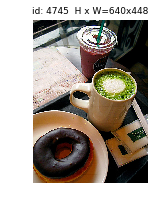



 config.DETECTION_MAX_INSTANCES:  200
 Detections shape: (13, 7)
 mrcnn.evaluate() : Return from  predict()
    Length of detections   :  1
    Length of rpn_roi_proposals   :  1
    Length of mrcnn_class  :  1
    Length of mrcnn_bbox   :  1
    Length of pr_hm        :  1
    Length of pr_hm_scores :  1

   boxes_to_image_domain(): image_meta:  <class 'numpy.ndarray'> (89,)
Image meta:  [4745  640  448    3    0  153 1024  870    1    1]


D:\Program Files\Anaconda3\envs\TF\lib\site-packages\scipy\ndimage\interpolation.py:583: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


In [49]:
# from mrcnn.prep_notebook import run_fcn_detection
# fcn_results, fcn_gt_data = run_fcn_detection(fcn_model, mrcnn_model,dataset_test, image_id=1927, verbose = 1)
results= run_mrcnn_detection(mrcnn_model,dataset_test, image_ids=4745, verbose = 0, display = True)

###  Display Results

In [50]:
np_format = {}
float_formatter = lambda x: "%10.4f" % x
int_formatter   = lambda x: "%10d" % x
np_format['float'] = float_formatter
np_format['int']   = int_formatter
np.set_printoptions(linewidth=195, precision=4, floatmode='fixed', threshold =10000, formatter = np_format)

#### Display MRCNN scores - 1st style

In [51]:
lmt =15
r = results[0]
print('       classes :', r['class_ids'][:lmt])
names  = " ".join([ '{:>10s}'.format(class_names[i][-10:]) for i in r['class_ids'][:lmt]])

print('               : ', names)
print('                ', r['detection_ind'][:lmt])
print('   orig scores :',r['scores'][:lmt])
print('   norm scores :', r['pr_scores'][:lmt,8])
# print('  pr_scores[5] :', r['pr_scores'][:,5])

print('-'*185)
print('   pr_scrs[11] :', r['pr_scores'][:lmt,11])
# print(' fcn_scores[8] :', r['fcn_scores'][:lmt,11])
print()
print(' pr_scores[14] :', r['pr_scores'][:lmt,14])
# print('fcn_scores[13] :', r['fcn_scores'][:lmt,14])
print()
print(' pr_scores[20] :', r['pr_scores'][:lmt,20])
# print('fcn_scores[19] :', r['fcn_scores'][:lmt,20])

       classes : [        42         55         61         74         74         42         61         72         45         40         46         56         42]
               :         cup      donut ning table       book       book        cup ning table       sink      spoon     bottle       bowl       cake        cup
                 [         1          1          1          1          1          1          1          1          1          1          1          1          1]
   orig scores : [    0.9868     0.9839     0.9187     0.9010     0.8916     0.8605     0.7885     0.5879     0.5422     0.5009     0.4983     0.3342     0.3234]
   norm scores : [    1.0000     1.0000     1.0000     1.0000     0.9896     0.8720     0.8583     1.0000     1.0000     1.0000     1.0000     1.0000     0.3277]
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
   pr

### Display detections on Image

Image Meta:  [      4745        640        448          3          0        153       1024        870          1          1]


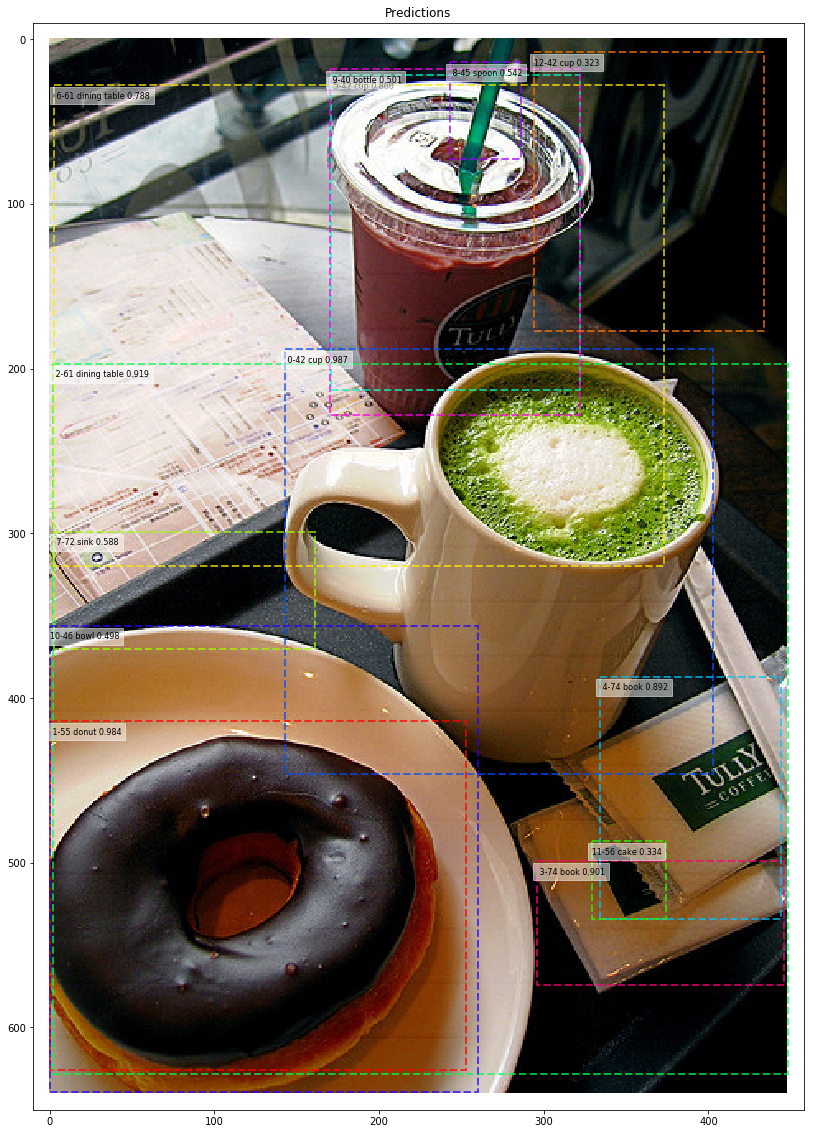

In [52]:
from mrcnn.utils import log # Display results
ax = visualize.get_ax(rows =1, cols = 1, size= 20)
r = results[0]
print('Image Meta: ', r['orig_image_meta'][:10])
visualize.display_instances(r['image'], r['rois'],  r['class_ids'], dataset_test.class_names, r['scores'], 
                            ax=ax, title="Predictions", score_range=(0.0, 1.7))

### Compute mAP and Display Precision/Recall Curve

In [1]:
orig_score = 5
norm_score = 8
alt_scr_0  = 11
alt_scr_1  = 14   # in MRCNN alt_scr_1 ans alt_scr_2 are the same
alt_scr_2  = 18

# Draw precision-recall curve
r = results[0]
AP, precisions, recalls, overlaps = utils.compute_ap(r['gt_bbox'], r['gt_class_id'], r['molded_rois'], r['class_ids'], r['scores'])
visualize.plot_precision_recall(AP, precisions, recalls,ttl = "- Orig Score")
# same as above
# AP, precisions, recalls, overlaps = utils.compute_ap(r['gt_bbox'], r['gt_class_id'], r['molded_rois'], r['class_ids'], r['pr_scores'][:,orig_score])
# visualize.plot_precision_recall(AP, precisions, recalls)
AP, precisions, recalls, overlaps = utils.compute_ap(r['gt_bbox'], r['gt_class_id'], r['molded_rois'], r['class_ids'], r['pr_scores'][:,norm_score])
visualize.plot_precision_recall(AP, precisions, recalls, ttl = "- Normlzd Score")
AP, precisions, recalls, overlaps = utils.compute_ap(r['gt_bbox'], r['gt_class_id'], r['molded_rois'], r['class_ids'], r['pr_scores'][:,alt_scr_0])
visualize.plot_precision_recall(AP, precisions, recalls, ttl = "- Alt Score 0 ")
AP, precisions, recalls, overlaps = utils.compute_ap(r['gt_bbox'], r['gt_class_id'], r['molded_rois'], r['class_ids'], r['pr_scores'][:,alt_scr_1])
visualize.plot_precision_recall(AP, precisions, recalls, ttl = "- Alt Score 1")
AP, precisions, recalls, overlaps = utils.compute_ap(r['gt_bbox'], r['gt_class_id'], r['molded_rois'], r['class_ids'], r['pr_scores'][:,alt_scr_2])
visualize.plot_precision_recall(AP, precisions, recalls, ttl = "- Alt Score 1")
  

NameError: name 'results' is not defined

##  Run MRCNN detection pipeline on third image

### Load an image using `get_inference_batch()`

In [ ]:
# 13378, 33816
# image, _ = get_inference_batch(dataset_test, mrcnn_model, 13378, display=True)    

In [ ]:
results= run_mrcnn_detection(mrcnn_model,dataset_test, image_id=13378, verbose = 0)
r = results[0]

### Display detections on Image

In [ ]:
print('Image Meta: ', r['orig_image_meta'][:10])
visualize.display_instances(r['image'], r['rois'],  r['class_ids'], dataset_test.class_names, r['scores'], 
                             title="Predictions", score_range=(0.0, 0.7))


# FCN Detection pipeline on images

##  Run FCN detection pipeline on first image

### Load an image using `get_inference_batch()` or `image_id`

Loading 1 images
image                    shape: (500, 335, 3)         min:    0.00000  max:  255.00000


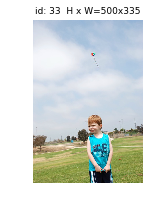

In [6]:
# image, _ = get_inference_batch(dataset_test,mrcnn_model, 33, display=True)

# image = get_image_batch(dataset_test, 44236,display=True)
image = get_image_batch(dataset_test, 33,display=True)

In [7]:
fcn_results = run_fcn_detection(fcn_model, mrcnn_model, dataset_test, image_ids = 33, verbose = 1)

Image Id  : 33     External Id: coco.221291     Image Reference: http://cocodataset.org/#explore?id=221291
Processing 1 images
image                    shape: (500, 335, 3)         min:    0.00000  max:  255.00000
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000
image_metas              shape: (1, 89)               min:    0.00000  max: 1024.00000
===>  call mrcnn_model.keras_model.predict()
===> mrcnn.detect() : Return from  predict()
    Length of detections   :  1
    Length of rpn_roi_proposals   :  1
    Length of mrcnn_class  :  1
    Length of mrcnn_bbox   :  1
    Length of pr_hm        :  1
    Length of pr_hm_scores :  1
 molded_rois: (6, 4)
 final_rois: (6, 4)
 pr_scores_by_class shape: (81, 200, 24)
 pr_scores_by_image shape: (6, 24)
===>   fcn.detect_from_images() : return from  mrcnn.detect() :  1

outputs returned from mrcnn.detect()   0    ['class_ids', 'detection_ind', 'detections', 'image', 'image_meta', 'molded_image', 'molded_ro

## Display FCN detections on Image

Detected classes: [ 1 11 27 34 66]
Image Meta:  [  33  500  335    3    0  169 1024  855    1    1]


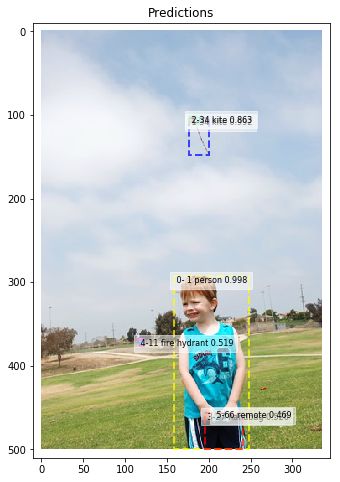

In [12]:
f = fcn_results[0]
print('Detected classes:', np.unique(f['class_ids']))
print('Image Meta: ', f['orig_image_meta'][:10])
visualize.display_instances(f['image'], f['rois'],  f['class_ids'], dataset_test.class_names, f['scores'], title="Predictions", score_range=(0.0, 1.7), size = 8)

GT classes:  [ 1 34]
Detected classes: [ 1 11 27 34 66]
Image Meta:  [  33  500  335    3    0  169 1024  855    1    1]
 Image_id    :  33  Reference:  http://cocodataset.org/#explore?id=221291 Coco Id: 221291
 Image meta  :  [  33  500  335    3    0  169 1024  855    1    1]
 Class ids   :  (2,)    [ 1 34]
 Class Names :  ['person', 'kite']


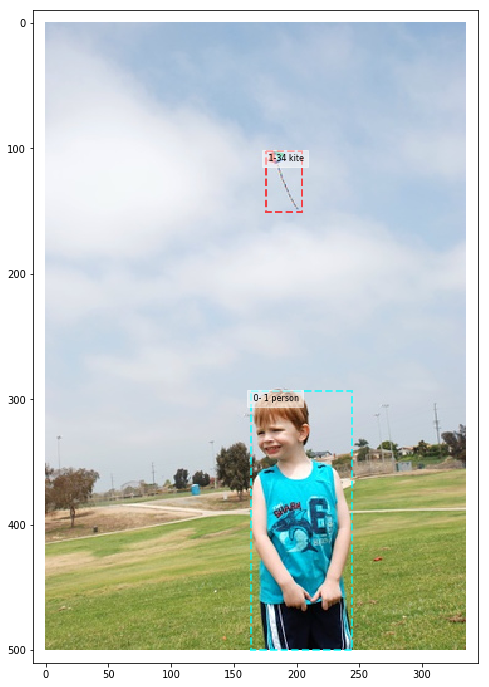

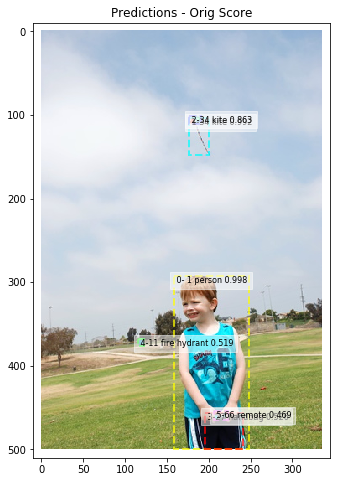

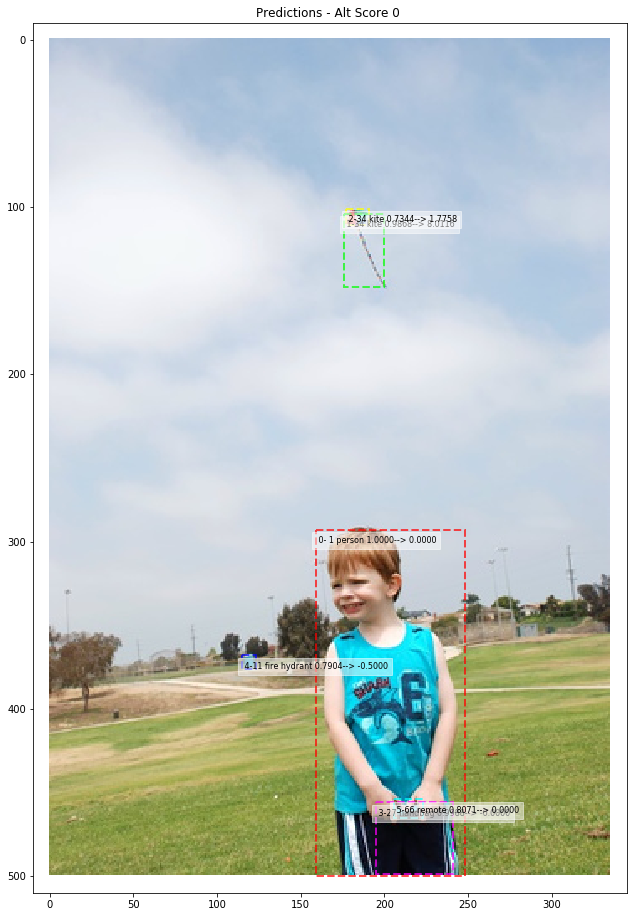

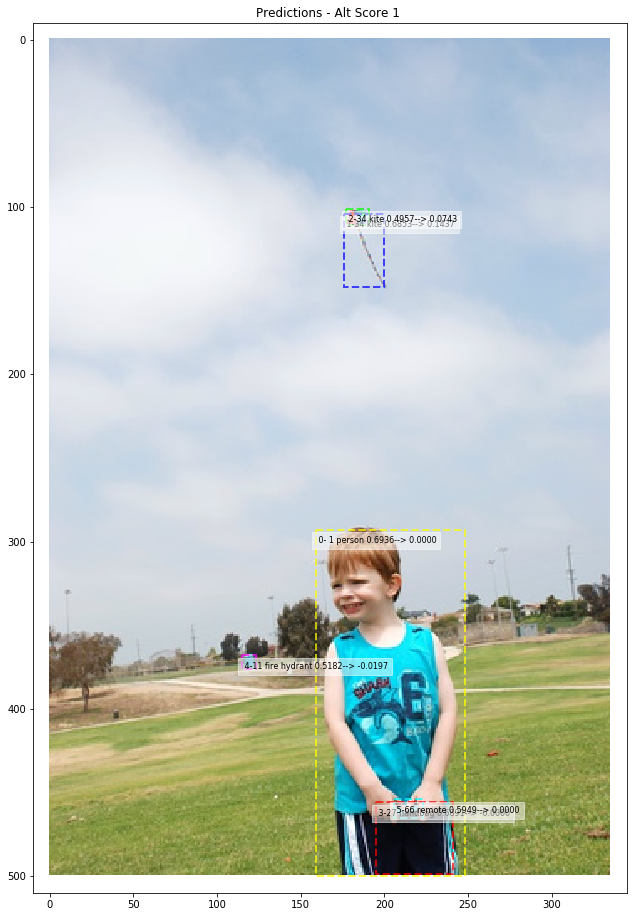

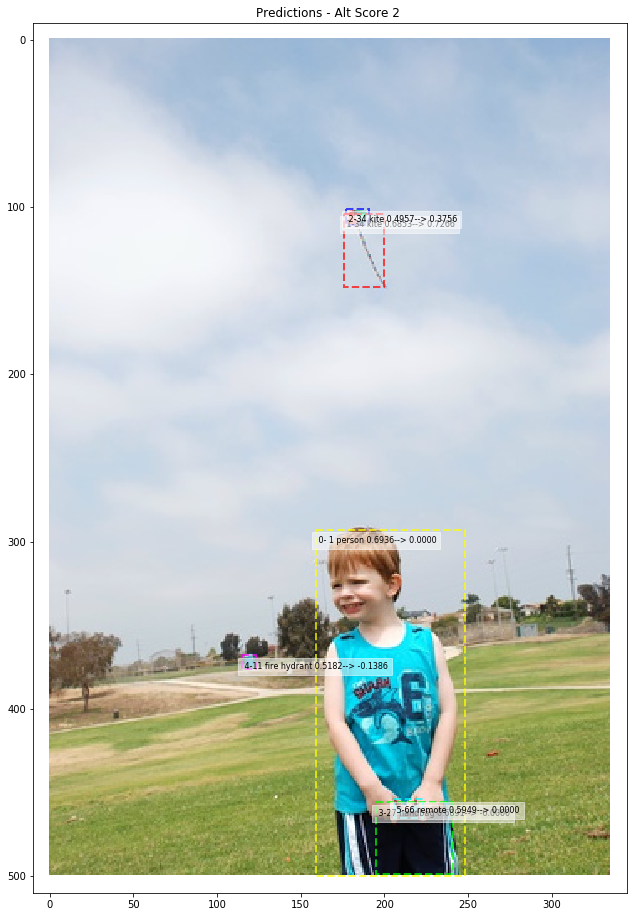

In [13]:
#### Display detections
## old_score   : 11
## alt_score_1 : 14
## alt_score_2 : 20
f = fcn_results[0]
# print('class ids: ', np.unique(f['pr_scores'][:,4]).astype(int).tolist())
det_classes = np.unique(f['class_ids'])
print('GT classes: ', np.unique(f['gt_class_ids']))
print('Detected classes:', det_classes)
print('Image Meta: ', f['orig_image_meta'][:10])
# clses = [42,43,44,45]
clses = None
visualize.display_image_gt(dataset_test, mrcnn_model.config, 33) ## 44236)
# visualize.display_instances_from_prscores(f['image'], f['pr_scores'], class_names, score_range=(-999, 9999), only_classes = [1])
# visualize.display_instances(f['image'], f['rois'],  f['class_ids'], class_names, f['scores'], title="Predictions", score_range=(0.7, 0.99), size = 24)
visualize.display_instances(f['image'], f['rois'], f['class_ids'], class_names, f['scores'], title="Predictions - Orig Score", only_classes=clses)
visualize.display_instances_two_scores(f['image'], f['rois'], f['class_ids'], class_names, f['pr_scores'][:,11], f['fcn_scores'][:,11],title="Predictions - Alt Score 0 ", only_classes=clses)
visualize.display_instances_two_scores(f['image'], f['rois'], f['class_ids'], class_names, f['pr_scores'][:,14], f['fcn_scores'][:,14],title="Predictions - Alt Score 1 ", only_classes=clses)
visualize.display_instances_two_scores(f['image'], f['rois'], f['class_ids'], class_names, f['pr_scores'][:,20], f['fcn_scores'][:,20],title="Predictions - Alt Score 2 ", only_classes=clses)
## display normalized scores 
# visualize.display_instances_two_scores(f['image'], f['rois'], f['class_ids'], class_names, f['pr_scores'][:, 8], f['fcn_scores'][:, 8],title="Predictions - Orig Score  (Normalized by class)", only_classes=clses)
# visualize.display_instances_two_scores(f['image'], f['rois'], f['class_ids'], class_names, f['pr_scores'][:,17], f['fcn_scores'][:,17],title="Predictions - Alt Score 1 (Normalized by class)", only_classes=clses)
# visualize.display_instances_two_scores(f['image'], f['rois'], f['class_ids'], class_names, f['pr_scores'][:,23], f['fcn_scores'][:,23],title="Predictions - Alt Score 2 (Normalized by class)", only_classes=clses)


## Display Results

In [14]:
np_format = {}
float_formatter = lambda x: "%10.4f" % x
int_formatter   = lambda x: "%10d" % x
np_format['float'] = float_formatter
np_format['int']   = int_formatter
np.set_printoptions(linewidth=195, precision=4, floatmode='fixed', threshold =10000, formatter = np_format)

#### Display MRCNN and FCN scores - 1st style

In [20]:
#### detections as returned from the model's `detect()` functon

lmt =18
f = fcn_results[0]
names  = " ".join([ '{:>10s}'.format(class_names[i][-10:]) for i in f['class_ids'][:lmt]])

print('            classes :', f['class_ids'][:lmt])
print('                    : ', names)
print('                    :', f['detection_ind'][:lmt])
print('          bbox area :', f['pr_scores'][:lmt,10])
print('          clip area :', f['pr_scores'][:lmt,13])
print()
print('        orig scores :',f['scores'][:lmt])
print('        norm scores :', f['pr_scores'][:lmt,8])
# print('  pr_scores[5] :', f['pr_scores'][:,5])

print('-'*185)
print('         pr_scrs[8] :', f['pr_scores'][:lmt,11])
print('      fcn_scores[8] :', f['fcn_scores'][:lmt,11])
print()
print('      pr_scores[13] :', f['pr_scores'][:lmt,14])
print('     fcn_scores[13] :', f['fcn_scores'][:lmt,14])
print()
print('      pr_scores[19] :', f['pr_scores'][:lmt,20])
print('     fcn_scores[19] :', f['fcn_scores'][:lmt,20])
print()
print(' norm pr_scores[13] :', f['pr_scores'][:lmt,17])
print('norm fcn_scores[13] :', f['fcn_scores'][:lmt,17])
print()
print(' norm pr_scores[19] :', f['pr_scores'][:lmt,23])
print('norm fcn_scores[19] :', f['fcn_scores'][:lmt,23])


            classes : [         1         34         34         27         11         66]
                    :      person       kite       kite    handbag re hydrant     remote
                    : [         1          1          1          1          1          1]
          bbox area : [ 4800.2500   275.6250    36.2500   517.3125    19.1250    51.7500]
          clip area : [  150.0000    35.0000    16.0000    49.0000     9.0000    20.0000]

        orig scores : [    0.9976     0.9923     0.8631     0.5262     0.5194     0.4695]
        norm scores : [    1.0000     1.0000     0.8698     1.0000     1.0000     1.0000]
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
         pr_scrs[8] : [    1.0000     0.9868     0.7344     0.9988     0.7904     0.8071]
      fcn_scores[8] : [    0.0000     8.0116     1.7758    -0.0000    -0.5000     0.0000]

   

#### Display MRCNN  and FCN scores - 2nd style

In [15]:
f = fcn_results[0]
for molded_bbox, cls, scr, pr_scr, fcn_scr in zip(f['molded_rois'].astype(np.int), f['class_ids'],  f['scores'], f['pr_scores'], f['fcn_scores']):
    print('{} {:2d}  {:.<18s}  {:5.4f} {}  '.format(molded_bbox, cls, dataset_test.class_names[cls], scr, fcn_scr[[4,5,6,7, 8]]))
    print('{:>86s} {}'.format(' mrcnn old style scores:  ',  pr_scr[[9,10,11]]))
    print('{:>86s} {}'.format(' fcn old style scores:    ', fcn_scr[[9,10,11]]))
    print()
    print('{:>86s} {}'.format(' mrcnn alt scores1:  ',pr_scr[[12,13,14,15,16,17]]))
    print('{:>86s} {}'.format(' mrcnn_scores2:  ',   pr_scr[[18,19,20,21,22,23]]))
    print()
    print('{:>86s} {}'.format(' fcn alt scores1:  ',fcn_scr[[12,13,14,15,16,17]]))
    print('{:>86s} {}'.format(' fcn_scores2:  '    ,fcn_scr[[18,19,20,21,22,23]]))
    print()

[       602        496       1024        678]  1  person............  0.9976 [    1.0000     0.9976     1.0000   200.0000     1.0000]  
                                                             mrcnn old style scores:   [    1.0000  4800.2500     1.0000]
                                                             fcn old style scores:     [    0.0000  4800.2500     0.0000]

                                                                  mrcnn alt scores1:   [  104.0425   150.0000     0.6936     1.0000     1.0000     1.0000]
                                                                      mrcnn_scores2:   [  104.0425   150.0000     0.6936     1.0000     1.0000     1.0000]

                                                                    fcn alt scores1:   [    0.0000   150.0000     0.0000     0.0000     1.0000     0.0000]
                                                                        fcn_scores2:   [    0.0000   150.0000     0.0000     0.0000     1.0000     0.0000

####  Display MRCNN  and FCN scores - 3rd style

In [24]:
f = fcn_results[0]
print(f['detections'].shape)
print('  old_scores  : (gauss. sum over complete bbox,    full bbox area,  gauss_sum * normlzd_score))')
print('  alt_scores 1: Heatmaps are clipped, each heatmap normalized, and multiplied by the normalized MRCNN score')
print('                ( gauss. sum over clipped bbox, clipped bbox area,  gauss_sum / mask_area):  ')
print()
print('  alt_scores 2: Individual heatmaps are clipped, normalized, scaled by norm_score, summed (pre class), \n \
               re-normalized, and then the score is computed:                                         \n \
               (gauss. sum over clipped bbox, clipped bbox area,  gauss_sum / mask_area):  ')

sort_by_class_order = np.argsort(f['class_ids'])


# for i in range(len( f['class_ids'])):
for i in sort_by_class_order:
#     print(i , f['rois'][i].astype(np.float), f['scores'][i], f['class_ids'][i], class_names[f['class_ids'][i]])
#     print(i , f['detections'][i], f['class_ids'][i], class_names[f['class_ids'][i]])
    det_type = '       --> ADDED FP ' if f['pr_scores'][i,6] == -1 else '      Original detection'
    print(i , f['pr_scores'][i,:9], f['pr_scores'][i,4], class_names[ f['pr_scores'][i,4].astype(np.int)], det_type) 
    print()
    print(i , 'pr: old_scores [9,10,11]:  '.rjust(90), f['pr_scores'][i,9:12])    
    print(i , '  alt_scores 1 [12 - 17]:  '.rjust(90), f['pr_scores'][i,12:18])    
    print(i , '  alt_scores 2 [18 - 23]:  '.rjust(90), f['pr_scores'][i,18:23])    
    print(i)
#     print(i , f['fcn_scores'][i,:8], f['fcn_scores'][i,4], class_names[ f['fcn_scores'][i,4].astype(np.int)])    
    print(i , 'fcn: old_scores [9,10,11]:  '.rjust(90), f['fcn_scores'][i,9:12])    
    print(i ,  '  alt_scores 1 [12 - 17]:  '.rjust(90), f['fcn_scores'][i,12:18])    
    print(i ,  '  alt_scores 2 [18 - 23]:  '.rjust(90), f['fcn_scores'][i,18:23])    
    print()
    print(i , '  old score [11]:  '.rjust(90), ' from mrcnn:{:10.4f}  from FCN: {:10.4f} '.format(f['pr_scores'][i,11], f['fcn_scores'][i,11]))
    print(i , 'alt score 1 [14]:  '.rjust(90), ' from mrcnn:{:10.4f}  from FCN: {:10.4f} '.format(f['pr_scores'][i,14], f['fcn_scores'][i,14]))
    print(i , 'alt score 2 [20]:  '.rjust(90), ' from mrcnn:{:10.4f}  from FCN: {:10.4f} '.format(f['pr_scores'][i,20], f['fcn_scores'][i,20]))
    print()

(200, 7)
  old_scores  : (gauss. sum over complete bbox,    full bbox area,  gauss_sum * normlzd_score))
  alt_scores 1: Heatmaps are clipped, each heatmap normalized, and multiplied by the normalized MRCNN score
                ( gauss. sum over clipped bbox, clipped bbox area,  gauss_sum / mask_area):  

  alt_scores 2: Individual heatmaps are clipped, normalized, scaled by norm_score, summed (pre class), 
                re-normalized, and then the score is computed:                                         
                (gauss. sum over clipped bbox, clipped bbox area,  gauss_sum / mask_area):  
0 [  293.0000   159.0000   500.0000   248.0000     1.0000     0.9976     1.0000   200.0000     1.0000] 1.0 person       Original detection

0                                                                pr: old_scores [9,10,11]:   [    1.0000  4800.2500     1.0000]
0                                                                  alt_scores 1 [12 - 17]:   [  104.0425   150.0000     0.6

In [25]:
# print(f['image_meta'])
# print(f['gt_bboxes'])

### Compute mAP and Display Precision/Recall Curve

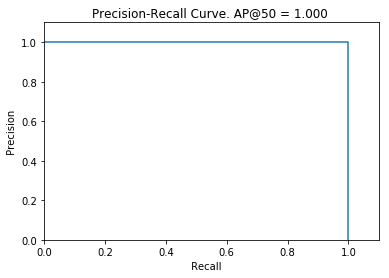

In [26]:
# Draw precision-recall curve
f= fcn_results[0]
AP, precisions, recalls, overlaps = utils.compute_ap(f['gt_bboxes'], f['gt_class_ids'], f['molded_rois'], f['class_ids'], f['scores'])
visualize.plot_precision_recall(AP, precisions, recalls)

#  Compute AP routine

In [38]:
from mrcnn.utils import trim_zeros, compute_overlaps
def compute_ap(gt_boxes, gt_class_ids,
               pred_boxes, pred_class_ids, pred_scores,
               iou_threshold=0.5):
    '''
    Compute Average Precision at a set IoU threshold (default 0.5).

    Returns:
    mAP:            Mean Average Precision
    precisions:     List of precisions at different class score thresholds.
    recalls:        List of recall values at different class score thresholds.
    overlaps:       [pred_boxes, gt_boxes] IoU overlaps.
    '''
    # Trim zero padding and sort predictions by score from high to low
    # TODO: cleaner to do zero unpadding upstream
    gt_boxes   = trim_zeros(gt_boxes)
    pred_boxes = trim_zeros(pred_boxes)
    pred_scores= pred_scores[:pred_boxes.shape[0]]
    indices    = np.argsort(pred_scores)[::-1]   ## sort indices from largest to smallest
    print('arg_sort indicies:', indices)
    pred_boxes     = pred_boxes[indices]
    pred_class_ids = pred_class_ids[indices]
    pred_scores    = pred_scores[indices]
    
    print(' Total predicitons: ')
    print(len(pred_class_ids), len(pred_boxes), len(pred_scores))
    # Compute IoU overlaps [pred_boxes, gt_boxes]
    overlaps = compute_overlaps(pred_boxes, gt_boxes)
    print('ovelatps: ',overlaps.shape)
    print(overlaps)
    
    # Loop through ground truth boxes and find matching predictions
    match_count = 0
    pred_match = np.zeros([pred_boxes.shape[0]])
    gt_match   = np.zeros([gt_boxes.shape[0]])
    
    for i in range(len(pred_boxes)):
        # Find best matching ground truth box
        sorted_ixs = np.argsort(overlaps[i])[::-1]
        for j in sorted_ixs:
            # If ground truth box is already matched, go to next one
            if gt_match[j] == 1:
                continue
            # If we reach IoU smaller than the threshold, end the loop
            iou = overlaps[i, j]
            if iou < iou_threshold:
                break
            # Do we have a match?
            if pred_class_ids[i] == gt_class_ids[j]:
                match_count  += 1
                gt_match[j]   = 1
                pred_match[i] = 1
                break
    print(' after overlap computation')
    print('pred_match :', pred_match)
    print('  gt_match :', gt_match)
    # Compute precision and recall at each prediction box step
    precisions = np.cumsum(pred_match) / (np.arange(len(pred_match)) + 1)
    recalls    = np.cumsum(pred_match).astype(np.float32) / len(gt_match)
    
    print(' precisions')
    print(np.cumsum(pred_match), '/', (np.arange(len(pred_match)) + 1))
    print(precisions)
    print()
    print(' recalls ')
    print(np.cumsum(pred_match), '/', len(gt_match))
    print(recalls)
    print()
    
    # Pad with start and end values to simplify the math
    precisions = np.concatenate([[0], precisions, [0]])
    recalls    = np.concatenate([[0], recalls, [1]])
    print('appended [0/0], [0/1] to front/end of precisions/recalls')
    print(' Pr: ', precisions)
    print(' Rc: ', recalls)
    print()
    
    
    # Ensure precision values decrease but don't increase. This way, the
    # precision value at each recall threshold is the maximum it can be
    # for all following recall thresholds, as specified by the VOC paper.
    for i in range(len(precisions) - 2, -1, -1):
        precisions[i] = np.maximum(precisions[i], precisions[i + 1])
    print('backtracking precsiosn values:', list(range(len(precisions) - 2, -1, -1)))
    print(' Pr: ', precisions)
    print(' Rc: ', recalls)
    print()
    
    # Compute mean AP over recall range
    print(' Rc[:-1] : ', recalls[:-1])
    print(' Rc[1:]  : ', recalls[1:])
    print(' Pr[1:]  : ', precisions[1:])
    print()

    ## find points where recall values changes 
    indices = np.where(recalls[:-1] != recalls[1:])[0] + 1
    mAP     = np.sum((recalls[indices] - recalls[indices - 1]) * precisions[indices])
    
    print('where recalls[:-1] != recalls[1:]:', np.where(recalls[:-1] != recalls[1:]))
    print('indices at recall changes : ', indices)
    print(' A1: recall[indices]  : ', recalls[indices])
    print(' A2: recall[indices-1]: ', recalls[indices-1])
    print(' A1 - A2              : ', (recalls[indices] - recalls[indices - 1]))
    print(' P1:precision[indices]: ', precisions[indices])
    print(' (A1-A2)*P1           : ', (recalls[indices] - recalls[indices - 1]) * precisions[indices])
    print(' Sum = mAP            : ', mAP)
    print(' Pr        : ', precisions)
    print(' Rc        : ', recalls)
    print(' Pr*Rc     : ', precisions*recalls)
    print(' Sum(Pr*Rc): ', np.sum(precisions*recalls))
    print(' Sum(Pr*Rc)/m: ', np.sum(precisions*recalls)/len(precisions))
    return mAP, precisions, recalls, overlaps

arg_sort indicies: [         0          1          2          3          4          5          6          7          8          9         10         11         12]
 Total predicitons: 
13 13 13
ovelatps:  (13, 7)
[[    0.0326     0.7973     0.1114     0.3882     0.1270     0.9571     0.1477]
 [    0.0000     0.0000     0.0262     0.0000     0.0000     0.0033     0.0014]
 [    0.0000     0.2137     0.0000     0.0551     0.2395     0.2111     0.0000]
 [    0.7207     0.0000     0.1182     0.0000     0.0000     0.0231     0.0556]
 [    0.0000     0.6930     0.0436     0.7026     0.1177     0.5441     0.0658]
 [    0.2855     0.0337     0.4838     0.0000     0.0000     0.0761     0.0927]
 [    0.0000     0.8452     0.0465     0.5638     0.1411     0.6602     0.0615]
 [    0.1214     0.1327     0.3926     0.0289     0.0000     0.2593     0.5568]
 [    0.8479     0.0000     0.1337     0.0000     0.0000     0.0272     0.0673]
 [    0.1923     0.0657     0.7351     0.0091     0.0000     0.1215

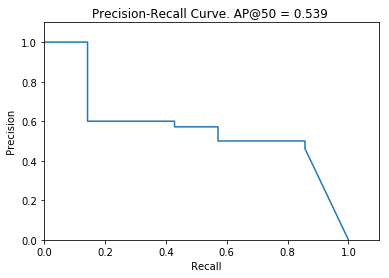

In [44]:
AP, precisions, recalls, overlaps = compute_ap(f['gt_bbox'], f['gt_class_id'], f['molded_rois'], f['class_ids'], f['scores'])
visualize.plot_precision_recall(AP, precisions, recalls)

Detected classes: [        44         46         46         56         61         61         74]
[[       200         72        587        136]
 [       139        161        887        972]
 [       130          0        448        302]
 [       323        261        843        829]
 [       632        645        887       1024]
 [       128          2        884       1024]
 [       409          0        895        268]]
Image Meta:  [     44236        338        451          3        128          0        895       1024          1          1]
 Image_id    :  44236  Reference:  http://cocodataset.org/#explore?id=269395 Coco Id: 269395
 Class ids   :  (7,)    [        44         46         46         56         61         61         74]
 Class Names :  ['knife', 'bowl', 'bowl', 'cake', 'dining table', 'dining table', 'book']


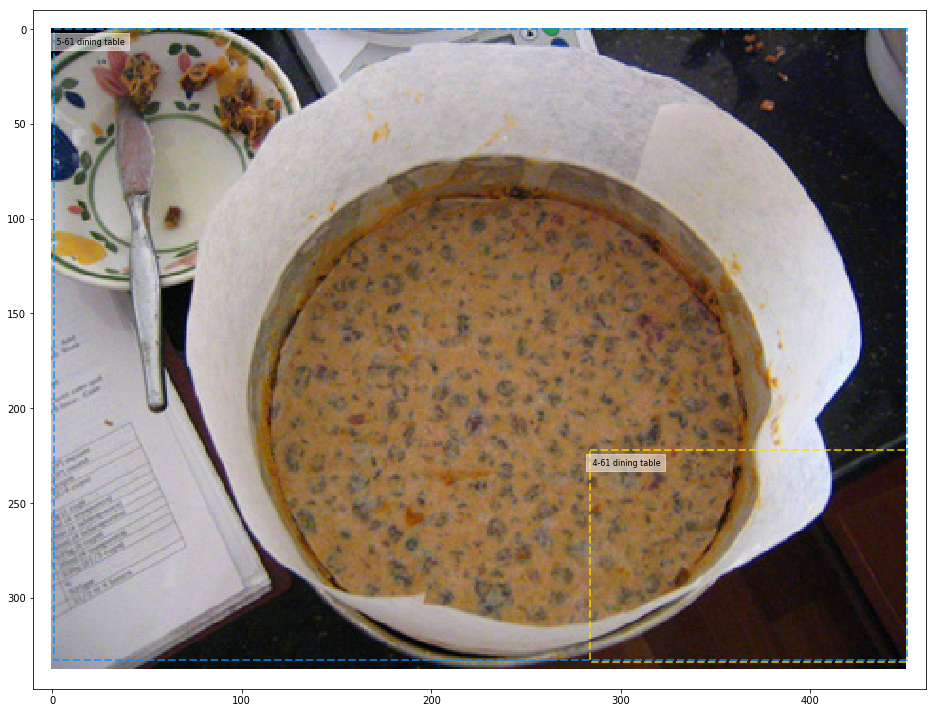

In [43]:
f = fcn_results[0]
clses = [61]
# print('class ids: ', np.unique(f['pr_scores'][:,4]).astype(int).tolist())

print('Detected classes:', f['gt_class_id'])
print(f['gt_bbox'])
print('Image Meta: ', f['orig_image_meta'][:10])
visualize.display_image_gt(dataset_test, mrcnn_model.config, 44236, only_classes=clses)

In [ ]:
len(precisions)
precisions


# Display Heatmaps

In [46]:
from mrcnn.visualize import (plot_one_bbox_heatmap, 
                             plot_3d_heatmap, plot_2d_heatmap, 
                              plot_2d_heatmap_compare, plot_3d_heatmap_compare)
# import matplotlib as plt
# %matplotlib inline
img_id = 0
image_id=f['orig_image_meta'][0]
print('Image id: ',image_id, ' Coco ID: ', dataset_test.image_info[image_id]['id'])
print(f['pr_scores'][:,4])
coco_class_names = dataset_test.class_names
pr_class_ids = np.unique(f['pr_scores'][:,4]).astype(int).tolist()
fcn_class_ids = np.unique(f['fcn_scores'][:,4]).astype(int).tolist()
print('Pred class ids: ', pr_class_ids)
print('FCN  class ids: ', fcn_class_ids)

Image id:  10  Coco ID:  131107
[   10.0000    10.0000    10.0000    10.0000    10.0000    10.0000    10.0000    10.0000    10.0000     5.0000]
Pred class ids:  [5, 10]
FCN  class ids:  [5, 10]


## Overlay Images with Heatmaps

### Overlay image with pred_heatmaps

In [ ]:
from mrcnn.visualize import display_heatmaps, display_heatmaps_fcn, display_heatmaps_mrcnn, inference_heatmaps_display
# visualize.display_image_bw(image)
# print(model_gt_heatmap_scores.shape)
class_ids = np.unique(f['pr_scores'][:,4]).astype(int).tolist()
print('class ids: ', class_ids)
inference_heatmaps_display(fcn_results, 0, class_ids = class_ids, class_names = coco_class_names, hm = 'pr_hm' ,config = mrcnn_model.config, scaling = 'class') 
# , display_heatmaps_mrcnn(train_batch_x, model_output, 0, hm = 'pr',  
#                      config = mrcnn_config, class_ids = class_ids)

### Overlay image with fcn_heatmaps

In [ ]:
from mrcnn.visualize import display_heatmaps, display_heatmaps_fcn, display_heatmaps_mrcnn, inference_heatmaps_display
# visualize.display_image_bw(image)
# print(model_gt_heatmap_scores.shape)
class_ids = np.unique(f['pr_scores'][:,4]).astype(int).tolist()
print('class ids: ', class_ids)
inference_heatmaps_display(fcn_results, 0, class_ids = class_ids, class_names = coco_class_names, hm = 'fcn_hm' ,config = mrcnn_model.config, scaling = 'class') 
# , display_heatmaps_mrcnn(train_batch_x, model_output, 0, hm = 'pr',  

### Overlay image with pr_heatmaps and fcn_heatmaps

 Scaling options are: 'all', 'class', 'each' , or  'clip' : 
 heatmap shape:  (256, 256, 81)
 Bounding boxes shape:  (81, 200, 24)
Image shape : (332, 500, 3)  class_ids: [ 5 10]


D:\Program Files\Anaconda3\envs\TF\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
D:\Program Files\Anaconda3\envs\TF\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


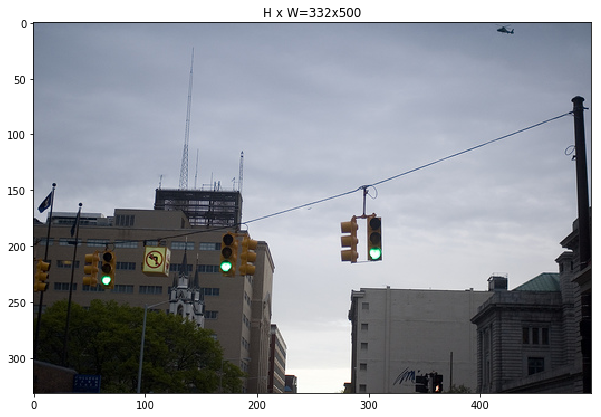

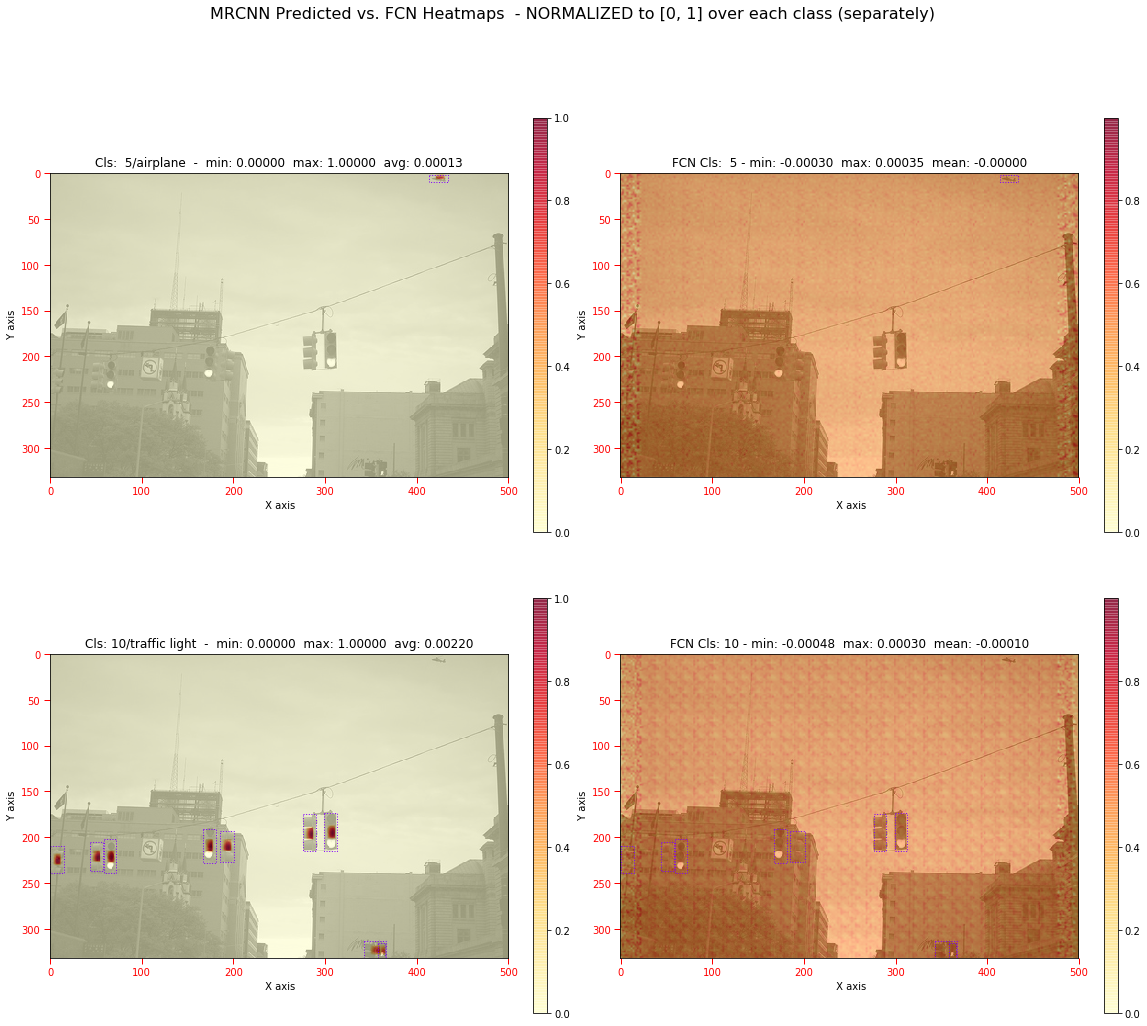

In [29]:
visualize.inference_heatmaps_compare(fcn_results, image_id = 0 , hm = 'fcn_hm', 
                     config = mrcnn_model.config, class_ids = pr_class_ids, class_names = coco_class_names, scaling = 'each')

##  3D Plots

####  3D plot of `fcn_heatmap` returned form model - classes predicted by MRCNN only 

In [ ]:
print(np.max(f['fcn_hm']), np.min(f['fcn_hm']))

print(f['fcn_hm'].shape)
class_ids = np.unique(f['pr_scores'][:,4]).astype(int).tolist()
print('Image : {}  ClassIds: {}'.format(img_id, class_ids))
plot_3d_heatmap(f['fcn_hm'], 0, class_ids,class_names = coco_class_names, scaling = 'none')

####  3D plot of `fcn_softmax` returned form model - only classes in pred_scores

In [ ]:
for img_id in [0]: ##range(mrcnn_config.BATCH_SIZE):
    print(f['fcn_hm'].shape)
    class_ids = np.unique(f['pr_scores'][:,4]).astype(int).tolist()
    print('Image : {}  ClassIds: {}'.format(img_id, class_ids))
    plot_3d_heatmap(f['fcn_sm'], 0, class_ids,class_names = coco_class_names, scaling = 'none')

## 2D heatmaps

 Scaling options are 'all', 'class'/'each', 'clip', or 'none' 
 Shape of Z:  (256, 256, 81)  boxes:  (81, 200, 24)
 Image Id:  0  Display classes: [ 5 10]
 rows   1  columns : 3 boxes.shape :  (81, 200, 24)
 min_z_all shape: ()  min_z_all: 0.0  max_z_all: () max_z_all: 1.0
 min_z_cls shape: (1, 1, 81)  max_z_cls shape: (1, 1, 81)
 SCALING == none 


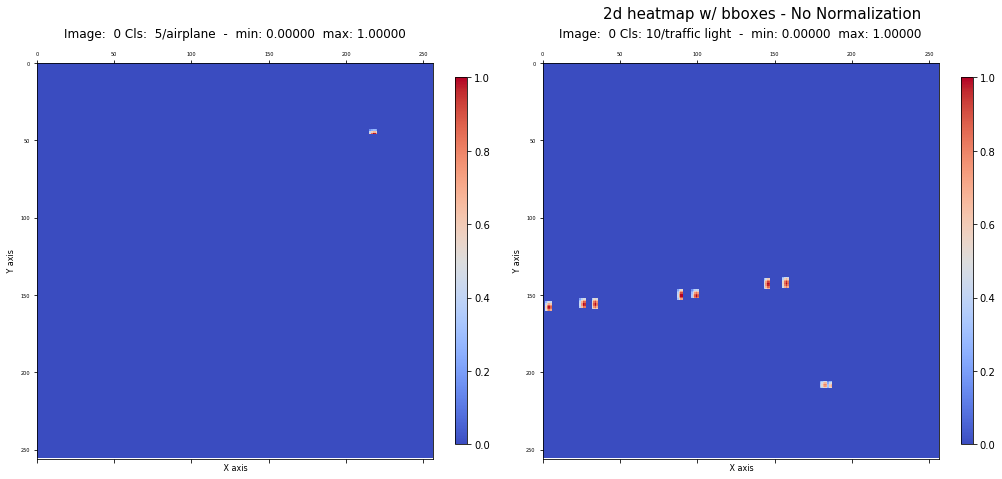

In [47]:
img_id = 0
 
pr_class_ids = np.unique(f['class_ids'])
fig = visualize.plot_2d_heatmap(f['pr_hm'], f['pr_scores_by_class'], img_id, pr_class_ids, columns = 3, num_bboxes = 0,
                          class_names = class_names, scale = 4, scaling = 'none')

 Scaling options are 'all', 'class'/'each', 'clip', or 'none' 
 Shape of Z:  (256, 256, 81)  boxes:  (81, 200, 24)
 Image Id:  0  Display classes: [ 5 10]
 rows   1  columns : 3 boxes.shape :  (81, 200, 24)
 min_z_all shape: ()  min_z_all: -0.48535615  max_z_all: () max_z_all: 0.7116628
 min_z_cls shape: (1, 1, 81)  max_z_cls shape: (1, 1, 81)
 SCALING == none 


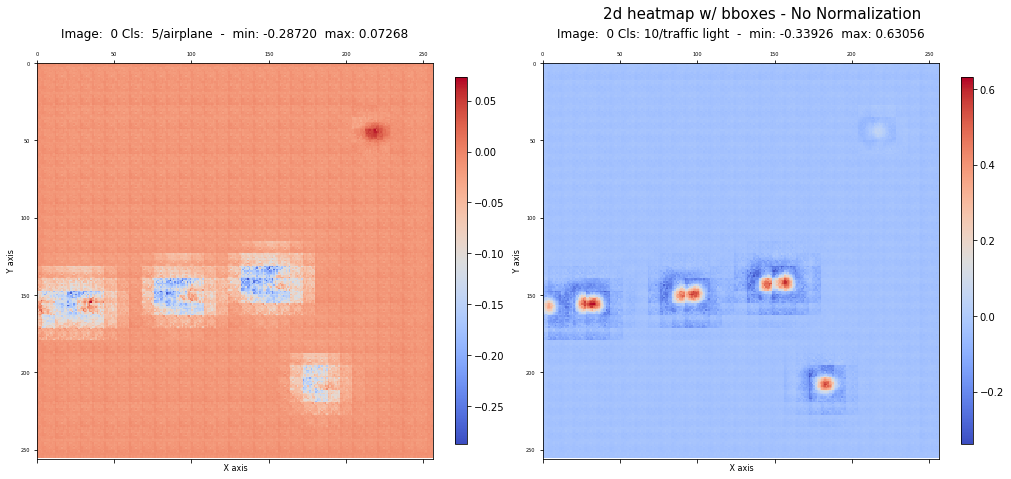

In [48]:
img_id = 0
 
pr_class_ids = np.unique(f['class_ids'])
fig = visualize.plot_2d_heatmap(f['fcn_hm'], f['fcn_scores_by_class'], img_id, pr_class_ids, columns = 3, num_bboxes = 0,
                          class_names = class_names, scale = 4, scaling = 'none')

# Run Object Detection on Random Images

###  Test on loaded image

### Test on a random image from images folder

2502287818_41e4b0c4fb_z.jpg


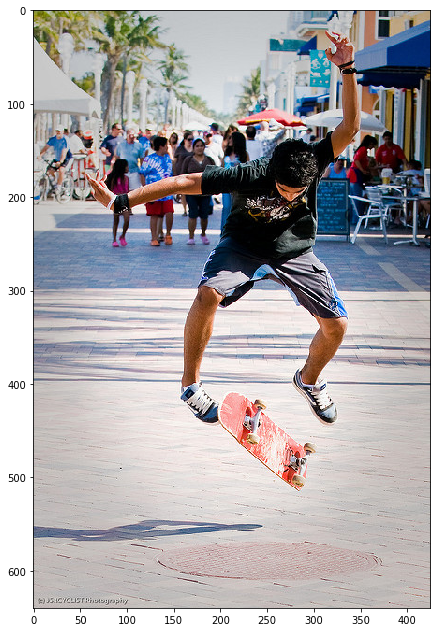

In [6]:
# Load a random image from the images folder
# import mrcnn.visualize as visualize
%matplotlib inline
import random, os
import skimage.io
import matplotlib.pyplot as plt
IMAGE_DIR = 'E:/git_projs/mrcnn3/images'
# IMAGE_DIR = '/esat/tiger/joramas/mscStudentsData/kbardool/projs/mrcnn3/images'
file_names = next(os.walk(IMAGE_DIR))[2]
# print(file_names)
random_filename = random.choice(file_names)
print(random_filename)
image = skimage.io.imread(os.path.join(IMAGE_DIR, random_filename))
plt.figure(figsize=(11,11))
plt.imshow(image)

In [7]:
# Run detection
# results = mrcnn_model.detect([image], verbose=1)
results = fcn_model.detect_from_images(mrcnn_model, [image], verbose=1)

NameError: name 'fcn_model' is not defined

In [ ]:
r = results[0]
for bbox, cls, scr in zip(r['rois'], r['class_ids'],  r['scores']):
    print('{}    {:2d}    {:.<20s}  {:5.4f} '.format(bbox,cls,dataset_test.class_names[cls], scr))
visualize.display_instances(image, r['rois'], r['class_ids'], 
                            dataset_test.class_names, r['scores'], ax=visualize.get_ax(size=16))

###  Display random image from test dataset

In [ ]:
# Load random image and mask. ### 27711 persons and boats
image_id = np.random.choice(dataset_test.image_ids)
image    = dataset_test.load_image(image_id)
mask, class_ids = dataset_test.load_mask(image_id)
# Compute Bounding box
bbox = utils.extract_bboxes(mask)

# Display image and additional stats
print("image_id ", image_id, dataset_test.image_reference(image_id))
log("image", image)
log("mask", mask)
log("class_ids", class_ids)
log("bbox", bbox)
print(class_ids.shape[0], bbox.shape[0])
# Display image and instances
# visualize.display_instances_with_mask(image, bbox, mask, class_ids, dataset_train.class_names)
visualize.display_instances(image, bbox, class_ids, dataset_test.class_names)

In [ ]:
results = mrcnn_model.detect([image], verbose=1)

In [ ]:
print('resutls :', results)
# Visualize results
r = results[0]
for bbox, cls, scr in zip(r['rois'], r['class_ids'],  r['scores']):
    print('{}    {:2d}    {:.<20s}  {:5.4f} '.format(bbox,cls,dataset_test.class_names[cls], scr))
visualize.display_instances(image, r['rois'], r['class_ids'], dataset_test.class_names, r['scores'])

### Test on a random image from test dataset

In [ ]:
# Test on a random image
# Validation dataset
# dataset_val = shapes.ShapesDataset()
# dataset_val.load_shapes(50, config.IMAGE_SHAPE[0], config.IMAGE_SHAPE[1])
# dataset_val.prepare()

image_id = random.choice(dataset_test.image_ids)
original_image, image_meta, gt_class_id, gt_bbox =\
    load_image_gt(dataset_test, mrcnn_config, image_id, use_mini_mask=False)
    

print('Image Id :', image_id)    
shape_list = dataset_test.image_info[image_id] 
pp.pprint(shape_list)
log("original_image", original_image)
log("image_meta", image_meta)
print(image_meta)
log("gt_class_id", gt_bbox)
log("gt_bbox", gt_bbox)
# log("gt_mask", gt_mask)

print(" 1: person   2: car  3: sun  4: building  5: tree  6: cloud ")
visualize.display_instances(original_image, gt_bbox, gt_class_id, 
                            dataset_test.class_names, figsize=(8, 8))

In [ ]:
results = model.detect([original_image], verbose=1)

In [ ]:
r = results[0]
print('  rois       : ', r['rois'])
print('  masks      : ', r['masks'].shape)
print('  class ids  : ', r['class_ids'])
print('  class names: ', dataset_test.class_names)
print('  scores     : ', r['scores'])
visualize.display_instances(original_image, r['rois'], r['masks'], r['class_ids'], 
                            dataset_test.class_names, r['scores'], ax=get_ax())

# Evaluation of mAP  over a number of images

In [1]:
from mrcnn.utils import trim_zeros, compute_overlaps
from mrcnn.calculate_map import update_map_dictionaries
np_format = {}
float_formatter = lambda x: "%10.4f" % x
# int_formatter   = lambda x: "%10d" % x
np_format['float'] = float_formatter
# np_format['int']   = int_formatter
np.set_printoptions(linewidth=195, precision=4, floatmode='fixed', threshold =10000, formatter = np_format)

ImportError: Could not find 'cudart64_80.dll'. TensorFlow requires that this DLL be installed in a directory that is named in your %PATH% environment variable. Download and install CUDA 8.0 from this URL: https://developer.nvidia.com/cuda-toolkit

In [ ]:
All_APResults = {}

In [12]:
path = '/home/kbardool/git_projs/mrcnn3/train_coco'
AP_results_file= 'test_AP_results_2019_01_08'
with open(os.path.join(path, AP_results_file+'.pkl'), 'rb') as outfile:
    APRes = pickle.load(outfile)
All_APResults = APRes

## Load weight file

In [34]:
# DIR_WEIGHTS =  'F:/models_newshapes/train_fcn8_l2_newshapes/fcn20181224T0000' ### Training with LR=0.00001, MSE Loss NO L2 Regularization
DIR_WEIGHTS1 =  '/home/kbardool/models_coco/train_fcn8L2_bce_subset/fcn20181221T0000'
DIR_WEIGHTS2 =  '/home/kbardool/models_coco/train_fcn8L2_bce_subset/fcn20181230T0000'
DIR_WEIGHTS3 =  '/home/kbardool/models_coco/train_fcn8L2_bce_subset/no_improvement_fcn20181223T0000'
DIR_WEIGHTS4 =  '/home/kbardool/models_coco/train_fcn8L2_bce_subset/no_improvement_fcn20181224T0000'
DIR_WEIGHTS5 =  '/home/kbardool/models_coco/train_fcn8L2_bce_subset/no_improvement_fcn20181227T0000'

files1  = ['fcn_0001.h5','fcn_0010.h5','fcn_0026.h5','fcn_0162.h5','fcn_0350.h5', 'fcn_0584.h5','fcn_0657.h5','fcn_0950.h5']
files2  = ['fcn_1065.h5','fcn_1095.h5','fcn_1108.h5']
files3  = ['fcn_1294.h5']
files4  = ['fcn_1065.h5','fcn_1083.h5','fcn_1087.h5','fcn_1213.h5','fcn_1475.h5', 'fcn_1539.h5','fcn_1541.h5','fcn_1567.h5']
files5  = ['fcn_1065.h5','fcn_1436.h5']

DIR_WEIGHTS = DIR_WEIGHTS5
files       = files5
FILE_IDX    = 1
weights_file = os.path.join(DIR_WEIGHTS  , files[FILE_IDX])
print("Loading weights ", weights_file)
fcn_model.load_model_weights(weights_file)

Loading weights  /home/kbardool/models_coco/train_fcn8_l2_bce_subset/no_improvement_fcn20181227T0000/fcn_1436.h5
-----------------------------------------------
 Load Model with init parm: [ /home/kbardool/models_coco/train_fcn8_l2_bce_subset/no_improvement_fcn20181227T0000/fcn_1436.h5 ]
-----------------------------------------------
 ---> Explicit weight file
>>> load_weights() from : /home/kbardool/models_coco/train_fcn8_l2_bce_subset/no_improvement_fcn20181227T0000/fcn_1436.h5
    Weights file loaded: /home/kbardool/models_coco/train_fcn8_l2_bce_subset/no_improvement_fcn20181227T0000/fcn_1436.h5 
FCN  MODEL Load weight file COMPLETE 


In [16]:
orig_score = 5
norm_score = 8
alt_scr_0  = 11
alt_scr_1  = 14   # in MRCNN alt_scr_1 ans alt_scr_2 are the same
alt_scr_2  = 20

class_dict = []
gt_dict = {}
pr_dict = {}
 
for a,b in zip(dataset_test.class_ids, dataset_test.class_names):
    class_dict.append({'id'   : int(a),
                         'name' : b,
                         'scores': [],
                         'bboxes': [],
                         'mrcnn_score_orig' : [],
                         'mrcnn_score_norm' : [], 
                         'mrcnn_score_0' : [],
                         'mrcnn_score_1' : [],
                         'mrcnn_score_2' : [],
                         'fcn_score_0' : [],
                         'fcn_score_1' : [],
                         'fcn_score_2' : [],                      
                      })

# Compute VOC-Style mAP @ IoU=0.5
# Running on 10 images. Increase for better accuracy.

In [35]:
IMGS = 500
image_ids = dataset_test.image_ids[:IMGS]
# image_ids = np.random.choice(dataset_test.image_ids, 50)
# print(image_ids)


MRCNN_AP_Orig = []
MRCNN_AP_0 = [] 
MRCNN_AP_1 = [] 
MRCNN_AP_2 = []
FCN_AP_0   = []
FCN_AP_1   = []
FCN_AP_2   = []

for image_id in image_ids:
    # Load image and ground truth data
    print('==> Calculate AP for image_id : ', image_id)
    # Run object detection
#     eval_batch = get_inference_batch(dataset_test, mrcnn_model.config, image_id, display = False)    
#     fcn_results = fcn_model.evaluate(mrcnn_model, eval_batch, verbose =0)    
    fcn_results = run_fcn_detection(fcn_model, mrcnn_model, dataset_test, image_id, verbose = 0)
    
#     gt_dict, pr_dict, class_dict = update_map_dictionaries(fcn_results, gt_dict,pr_dict, class_dict)
    
    r = fcn_results[0] 
    # Compute AP
#     AP, precisions, recalls, overlaps
    AP, _, _, _= utils.compute_ap(r['gt_bboxes'], r['gt_class_ids'], r["molded_rois"], r["class_ids"], r["pr_scores"][:,orig_score])
    MRCNN_AP_Orig.append(AP)
    
    AP, _, _, _= utils.compute_ap(r['gt_bboxes'], r['gt_class_ids'], r["molded_rois"], r["class_ids"], r["pr_scores"][:,alt_scr_0])
    MRCNN_AP_0.append(AP)
    
    AP, _, _, _= utils.compute_ap(r['gt_bboxes'], r['gt_class_ids'], r["molded_rois"], r["class_ids"], r["fcn_scores"][:,alt_scr_0])
    FCN_AP_0.append(AP)

    AP, _, _, _= utils.compute_ap(r['gt_bboxes'], r['gt_class_ids'], r["molded_rois"], r["class_ids"], r["pr_scores"][:,alt_scr_1])
    MRCNN_AP_1.append(AP)
    
    AP, _, _, _= utils.compute_ap(r['gt_bboxes'], r['gt_class_ids'], r["molded_rois"], r["class_ids"], r["fcn_scores"][:,alt_scr_1])
    FCN_AP_1.append(AP)
    
    AP, _, _, _= utils.compute_ap(r['gt_bboxes'], r['gt_class_ids'], r["molded_rois"], r["class_ids"], r["pr_scores"][:,alt_scr_2])
    MRCNN_AP_2.append(AP)
    
    AP, _, _, _= utils.compute_ap(r['gt_bboxes'], r['gt_class_ids'], r["molded_rois"], r["class_ids"], r["fcn_scores"][:,alt_scr_2])
    FCN_AP_2.append(AP)
    
print('complete')


==> Calculate AP for image_id :  0


/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


==> Calculate AP for image_id :  1
==> Calculate AP for image_id :  2
==> Calculate AP for image_id :  3
==> Calculate AP for image_id :  4
==> Calculate AP for image_id :  5
==> Calculate AP for image_id :  6
==> Calculate AP for image_id :  7
==> Calculate AP for image_id :  8
==> Calculate AP for image_id :  9
==> Calculate AP for image_id :  10
==> Calculate AP for image_id :  11
==> Calculate AP for image_id :  12
==> Calculate AP for image_id :  13
==> Calculate AP for image_id :  14
==> Calculate AP for image_id :  15
==> Calculate AP for image_id :  16
==> Calculate AP for image_id :  17
==> Calculate AP for image_id :  18
==> Calculate AP for image_id :  19
==> Calculate AP for image_id :  20
==> Calculate AP for image_id :  21
==> Calculate AP for image_id :  22
==> Calculate AP for image_id :  23
==> Calculate AP for image_id :  24
==> Calculate AP for image_id :  25
==> Calculate AP for image_id :  26
==> Calculate AP for image_id :  27
==> Calculate AP for image_id :  28
=

==> Calculate AP for image_id :  226
==> Calculate AP for image_id :  227
==> Calculate AP for image_id :  228
==> Calculate AP for image_id :  229
==> Calculate AP for image_id :  230
==> Calculate AP for image_id :  231
==> Calculate AP for image_id :  232
==> Calculate AP for image_id :  233
==> Calculate AP for image_id :  234
==> Calculate AP for image_id :  235
==> Calculate AP for image_id :  236
==> Calculate AP for image_id :  237
==> Calculate AP for image_id :  238
==> Calculate AP for image_id :  239
==> Calculate AP for image_id :  240
==> Calculate AP for image_id :  241
==> Calculate AP for image_id :  242
==> Calculate AP for image_id :  243
==> Calculate AP for image_id :  244
==> Calculate AP for image_id :  245
==> Calculate AP for image_id :  246
==> Calculate AP for image_id :  247
==> Calculate AP for image_id :  248
==> Calculate AP for image_id :  249
==> Calculate AP for image_id :  250
==> Calculate AP for image_id :  251
==> Calculate AP for image_id :  252
=

==> Calculate AP for image_id :  448
==> Calculate AP for image_id :  449
==> Calculate AP for image_id :  450
==> Calculate AP for image_id :  451
==> Calculate AP for image_id :  452
==> Calculate AP for image_id :  453
==> Calculate AP for image_id :  454
==> Calculate AP for image_id :  455
==> Calculate AP for image_id :  456
==> Calculate AP for image_id :  457
==> Calculate AP for image_id :  458
==> Calculate AP for image_id :  459
==> Calculate AP for image_id :  460
==> Calculate AP for image_id :  461
==> Calculate AP for image_id :  462
==> Calculate AP for image_id :  463
==> Calculate AP for image_id :  464
==> Calculate AP for image_id :  465
==> Calculate AP for image_id :  466
==> Calculate AP for image_id :  467
==> Calculate AP for image_id :  468
==> Calculate AP for image_id :  469
==> Calculate AP for image_id :  470
==> Calculate AP for image_id :  471
==> Calculate AP for image_id :  472
==> Calculate AP for image_id :  473
==> Calculate AP for image_id :  474
=

In [36]:
epochs = files[FILE_IDX].split('_')[1].replace('.h5','')
print(epochs)

APResult = {}
APResult['Filename']      =  weights_file  
APResult['Epochs']        =  epochs
APResult['MRCNN_AP_Orig'] =  MRCNN_AP_Orig
APResult['MRCNN_AP_0'   ] =  MRCNN_AP_0   
APResult['MRCNN_AP_1'   ] =  MRCNN_AP_1   
APResult['MRCNN_AP_2'   ] =  MRCNN_AP_2   
APResult['FCN_AP_0'     ] =  FCN_AP_0     
APResult['FCN_AP_1'     ] =  FCN_AP_1     
APResult['FCN_AP_2'     ] =  FCN_AP_2     
All_APResults[weights_file] = APResult

1436


In [37]:
# print('/'.join(weights_file.split('/')[-3:]))
print(len(All_APResults.keys()))
for i in sorted(All_APResults):
    print(i, All_APResults[i]['Epochs'])
#     print(i, All_APResults[i].keys())

16
/home/kbardool/models_coco/train_fcn8_l2_bce_subset/fcn20181221T0000/fcn_0001.h5 0001
/home/kbardool/models_coco/train_fcn8_l2_bce_subset/fcn20181221T0000/fcn_0010.h5 0010
/home/kbardool/models_coco/train_fcn8_l2_bce_subset/fcn20181221T0000/fcn_0657.h5 0657
/home/kbardool/models_coco/train_fcn8_l2_bce_subset/fcn20181221T0000/fcn_0950.h5 0950
/home/kbardool/models_coco/train_fcn8_l2_bce_subset/fcn20181230T0000/fcn_1065.h5 1065
/home/kbardool/models_coco/train_fcn8_l2_bce_subset/fcn20181230T0000/fcn_1095.h5 1095
/home/kbardool/models_coco/train_fcn8_l2_bce_subset/fcn20181230T0000/fcn_1108.h5 1108
/home/kbardool/models_coco/train_fcn8_l2_bce_subset/no_improvement_fcn20181223T0000/fcn_1294.h5 1294
/home/kbardool/models_coco/train_fcn8_l2_bce_subset/no_improvement_fcn20181224T0000/fcn_1065.h5 1065
/home/kbardool/models_coco/train_fcn8_l2_bce_subset/no_improvement_fcn20181224T0000/fcn_1087.h5 1087
/home/kbardool/models_coco/train_fcn8_l2_bce_subset/no_improvement_fcn20181224T0000/fcn_1213

In [171]:
print('done')
from mrcnn.utils import trim_zeros, compute_overlaps
np_format = {}
float_formatter = lambda x: "%10.4f" % x
# int_formatter   = lambda x: "%10d" % x
np_format['float'] = float_formatter
# np_format['int']   = int_formatter
np.set_printoptions(linewidth=195, precision=4, floatmode='fixed', threshold =10000, formatter = np_format)

done


In [38]:
# LIMIT = 10
# print(" {:>13s} {:>13s} {:>13s} {:>13s} {:>13s} {:>13s} {:>13s}".format("MRCNN_AP_Orig", "MRCNN_AP_0", "FCN_AP_0", "MRCNN_AP_1", "FCN_AP_1", "MRCNN_AP_2", "FCN_AP_2"))
# for i in range(LIMIT):
#     print(" {:13.5f} {:13.5f} {:13.5f} {:13.5f} {:13.5f} {:13.5f} {:13.5f}".format(
#         MRCNN_AP_Orig[i], MRCNN_AP_0[i], FCN_AP_0[i], MRCNN_AP_1[i], FCN_AP_1[i], MRCNN_AP_2[i], FCN_AP_2[i]))
# print()
 
epochs = files[FILE_IDX].split('_')[1].replace('.h5','')
print()
print('Training for {} epochs. Weight file: {}'.format(epochs, weights_file))
print()
print("{:6s} {:^10s} {:>13s} {:>13s} {:>13s} {:>13s} {:>13s} {:>13s} {:>13s}".format("Images", "Epochs", "MRCNN_AP_Orig", "MRCNN_AP_0", "FCN_AP_0", "MRCNN_AP_1", "FCN_AP_1", "MRCNN_AP_2", "FCN_AP_2"))
print('-'*116)
for LIMIT in [10,50,100,250,500]:

    print("{:<6d} {:^10s} {:13.5f} {:13.5f} {:13.5f} {:13.5f} {:13.5f} {:13.5f} {:13.5f}".format(LIMIT, epochs,
            np.mean(MRCNN_AP_Orig[:LIMIT]), 
            np.mean(MRCNN_AP_0[:LIMIT]), np.mean(FCN_AP_0[:LIMIT]), 
            np.mean(MRCNN_AP_1[:LIMIT]), np.mean(FCN_AP_1[:LIMIT]), 
            np.mean(MRCNN_AP_2[:LIMIT]), np.mean(FCN_AP_2[:LIMIT]) ))        


Weight file used:   /home/kbardool/models_coco/train_fcn8_l2_bce_subset/no_improvement_fcn20181227T0000/fcn_1436.h5    1436

Images   Epochs   MRCNN_AP_Orig    MRCNN_AP_0      FCN_AP_0    MRCNN_AP_1      FCN_AP_1    MRCNN_AP_2      FCN_AP_2
--------------------------------------------------------------------------------------------------------------------
10        1436          0.66267       0.60078       0.48956       0.59802       0.47345       0.58854       0.47583
50        1436          0.64352       0.54351       0.44689       0.53441       0.43302       0.53582       0.42618
100       1436          0.61713       0.54746       0.44873       0.52365       0.43817       0.52251       0.43289
250       1436          0.61895       0.53796       0.45754       0.53066       0.44114       0.52451       0.43919
500       1436          0.61046       0.52999       0.45207       0.52833       0.43712       0.52134       0.43532


In [25]:
r.keys()
print(r['image_meta'][:9])
print(r['gt_class_ids'])
print(r['gt_bboxes'])
print(r['class_ids']) 
print(r['molded_rois'])

# pr_scores_by_image = utils.byclass_to_byimage_np(r['pr_hm_scores'], 7)
# print(pr_scores_by_image[:,:5])
print(r['pr_scores'].shape)
print(r['pr_scores'][:,:4])

dict_keys(['fcn_hm_scores', 'fcn_hm', 'fcn_scores', 'molded_image', 'fcn_scores_by_class', 'pr_hm_scores', 'gt_bboxes', 'detection_ind', 'image', 'gt_class_ids', 'detections', 'molded_rois', 'pr_hm', 'fcn_sm', 'orig_image_meta', 'image_meta', 'pr_scores_by_class', 'scores', 'pr_scores', 'class_ids', 'rois'])

### Save to file

In [109]:
# path = "E:\\git_projs\\MRCNN3\\train_coco"
path = '/home/kbardool/git_projs/mrcnn3/train_coco'
cls_info_file = 'test_cls_info_epoch521_500'
pr_boxes_file = 'test_pr_bboxes_epoch521_500'
gt_boxes_file = 'test_gt_bboxes_epoch521_500'

In [178]:
import json
with open(os.path.join(path, cls_info_file+'.json'), 'w') as outfile:
    json.dump(class_dict, outfile)
with open(os.path.join(path, gt_boxes_file+'.json'), 'w') as outfile:
    json.dump(gt_dict, outfile)
with open(os.path.join(path, pr_boxes_file+'.json'), 'w') as outfile:
    json.dump(pr_dict, outfile)    

In [179]:
import pickle
 
with open(os.path.join(path, cls_info_file+'.pkl'), 'wb') as outfile:
    pickle.dump(class_dict, outfile)
with open(os.path.join(path, gt_boxes_file+'.pkl'), 'wb') as outfile:
    pickle.dump(gt_dict, outfile)
with open(os.path.join(path, pr_boxes_file+'.pkl'), 'wb') as outfile:
    pickle.dump(pr_dict, outfile)    

#### Save AP_Results

In [40]:
AP_results_file= 'test_AP_results_2019_01_08'
with open(os.path.join(path, AP_results_file+'.pkl'), 'wb') as outfile:
    pickle.dump(All_APResults, outfile)

#### Load AP_Results

In [237]:
del APRes 

In [6]:
path = '/home/kbardool/git_projs/mrcnn3/train_coco'
AP_results_file= 'test_AP_results_2019_01_08'
with open(os.path.join(path, AP_results_file+'.pkl'), 'rb') as outfile:
    APRes = pickle.load(outfile)

In [7]:
print(len(APRes.keys()))
 
for i in sorted(APRes):
    print(i)

12
/home/kbardool/models_coco/train_fcn8_l2_bce_subset/fcn20181221T0000/fcn_0001.h5
/home/kbardool/models_coco/train_fcn8_l2_bce_subset/fcn20181221T0000/fcn_0010.h5
/home/kbardool/models_coco/train_fcn8_l2_bce_subset/fcn20181221T0000/fcn_0657.h5
/home/kbardool/models_coco/train_fcn8_l2_bce_subset/fcn20181221T0000/fcn_0950.h5
/home/kbardool/models_coco/train_fcn8_l2_bce_subset/fcn20181230T0000/fcn_1065.h5
/home/kbardool/models_coco/train_fcn8_l2_bce_subset/fcn20181230T0000/fcn_1095.h5
/home/kbardool/models_coco/train_fcn8_l2_bce_subset/fcn20181230T0000/fcn_1108.h5
/home/kbardool/models_coco/train_fcn8_l2_bce_subset/no_improvement_fcn20181223T0000/fcn_1294.h5
/home/kbardool/models_coco/train_fcn8_l2_bce_subset/no_improvement_fcn20181224T0000/fcn_1065.h5
/home/kbardool/models_coco/train_fcn8_l2_bce_subset/no_improvement_fcn20181224T0000/fcn_1087.h5
/home/kbardool/models_coco/train_fcn8_l2_bce_subset/no_improvement_fcn20181224T0000/fcn_1475.h5
/home/kbardool/models_coco/train_fcn8_l2_bce_s

In [10]:
# LIMIT = 10
# print(" {:>13s} {:>13s} {:>13s} {:>13s} {:>13s} {:>13s} {:>13s}".format("MRCNN_AP_Orig", "MRCNN_AP_0", "FCN_AP_0", "MRCNN_AP_1", "FCN_AP_1", "MRCNN_AP_2", "FCN_AP_2"))
# for i in range(LIMIT):
#     print(" {:13.5f} {:13.5f} {:13.5f} {:13.5f} {:13.5f} {:13.5f} {:13.5f}".format(
#         MRCNN_AP_Orig[i], MRCNN_AP_0[i], FCN_AP_0[i], MRCNN_AP_1[i], FCN_AP_1[i], MRCNN_AP_2[i], FCN_AP_2[i]))
# print()
for key in sorted(APRes) :
    # print(' AP Result Entry :', key)
    print()
    print('Training for {} epochs. Weight file: {}'.format( APRes[key]['Epochs'], APRes[key]['Filename']))
    print()
    print("{:6s} {:^10s} {:>13s} {:>13s} {:>13s} {:>13s} {:>13s} {:>13s} {:>13s}".format("Images", "Epochs", "MRCNN_AP_Orig", "MRCNN_AP_0", "FCN_AP_0", "MRCNN_AP_1", "FCN_AP_1", "MRCNN_AP_2", "FCN_AP_2"))
    print('-'*116)
    for LIMIT in [10,50,100,250,500]:
        print("{:<6d} {:^10s} {:13.5f} {:13.5f} {:13.5f} {:13.5f} {:13.5f} {:13.5f} {:13.5f}".format(LIMIT, APRes[key]['Epochs'],
                np.mean(APRes[key]['MRCNN_AP_Orig'][:LIMIT]), 
                np.mean(APRes[key]['MRCNN_AP_0'][:LIMIT]), 
                np.mean(APRes[key]['FCN_AP_0'][:LIMIT]), 
                np.mean(APRes[key]['MRCNN_AP_1'][:LIMIT]),
                np.mean(APRes[key]['FCN_AP_1'][:LIMIT]), 
                np.mean(APRes[key]['MRCNN_AP_2'][:LIMIT]), 
                np.mean(APRes[key]['FCN_AP_2'][:LIMIT]) ))
    print('\n')


Weight file used:   /home/kbardool/models_coco/train_fcn8_l2_bce_subset/fcn20181221T0000/fcn_0001.h5    0001

Images   Epochs   MRCNN_AP_Orig    MRCNN_AP_0      FCN_AP_0    MRCNN_AP_1      FCN_AP_1    MRCNN_AP_2      FCN_AP_2
--------------------------------------------------------------------------------------------------------------------
10        0001          0.66267       0.60078       0.50128       0.59802       0.46439       0.58854       0.45759
50        0001          0.64352       0.54351       0.49043       0.53441       0.42969       0.53582       0.41446
100       0001          0.61713       0.54746       0.48583       0.52365       0.43663       0.52251       0.43357
250       0001          0.61895       0.53796       0.49131       0.53066       0.44571       0.52451       0.44237
500       0001          0.61046       0.52999       0.49013       0.52833       0.45104       0.52134       0.44797



Weight file used:   /home/kbardool/models_coco/train_fcn8_l2_bce_subset/f